In [104]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
import seaborn as sns 
mpl.rcParams['figure.dpi'] = 400

#### Estimating Coefficients and Intercepts of Logistic Regression

$log\;loss = \frac{1}{n}\Sigma^n_{i=1}-(y_ilog(p_i)+(1-y_i)log(1-p_i))$ - log loss / cross-entropy loss

This is the typical loss function used in logistic regression, (for regresssion its the mean absolute error or the mean squared error). If the true label, $y_i$ is 1, the cost function reduces to $-y_i(log(p_i)) = -log(p_i)$; if the true label $y_i$ is 0, the cost function reduces to $-log(1-p_i)$. Thus the log-loss cost for a sample is the negative natural logarithm of the probability assigned to the true class $-log(p_i)$ for positive samples, $-log(1-p_i)$ for the negative samples. 

A look at the graph of the natural log of probability values (values between 0 and 1), shows that if the probability assigned to the true class is high, the natural log approaches 0, and negative of 0 is 0, so the cost is 0. If the probability assigned to the true class is low, the natural log is a negative number, meaning the cost is a positive number. Note that the sigmoid function approaches 0 and 1 asymptotically, so no assigned probability is ever exactly 0 or 1.

In [105]:
X_log = np.linspace(0.01, 0.99, 99)     # note that probabilities are between 0 and 1 so log is negative or 0
print(X_log[:5], '...', X_log[-5:])

[0.01 0.02 0.03 0.04 0.05] ... [0.95 0.96 0.97 0.98 0.99]


In [106]:
y_log = np.log(X_log)           # np.log is natural logarithm, element-wise

Text(0.5, 1.0, 'Natural logarithm')

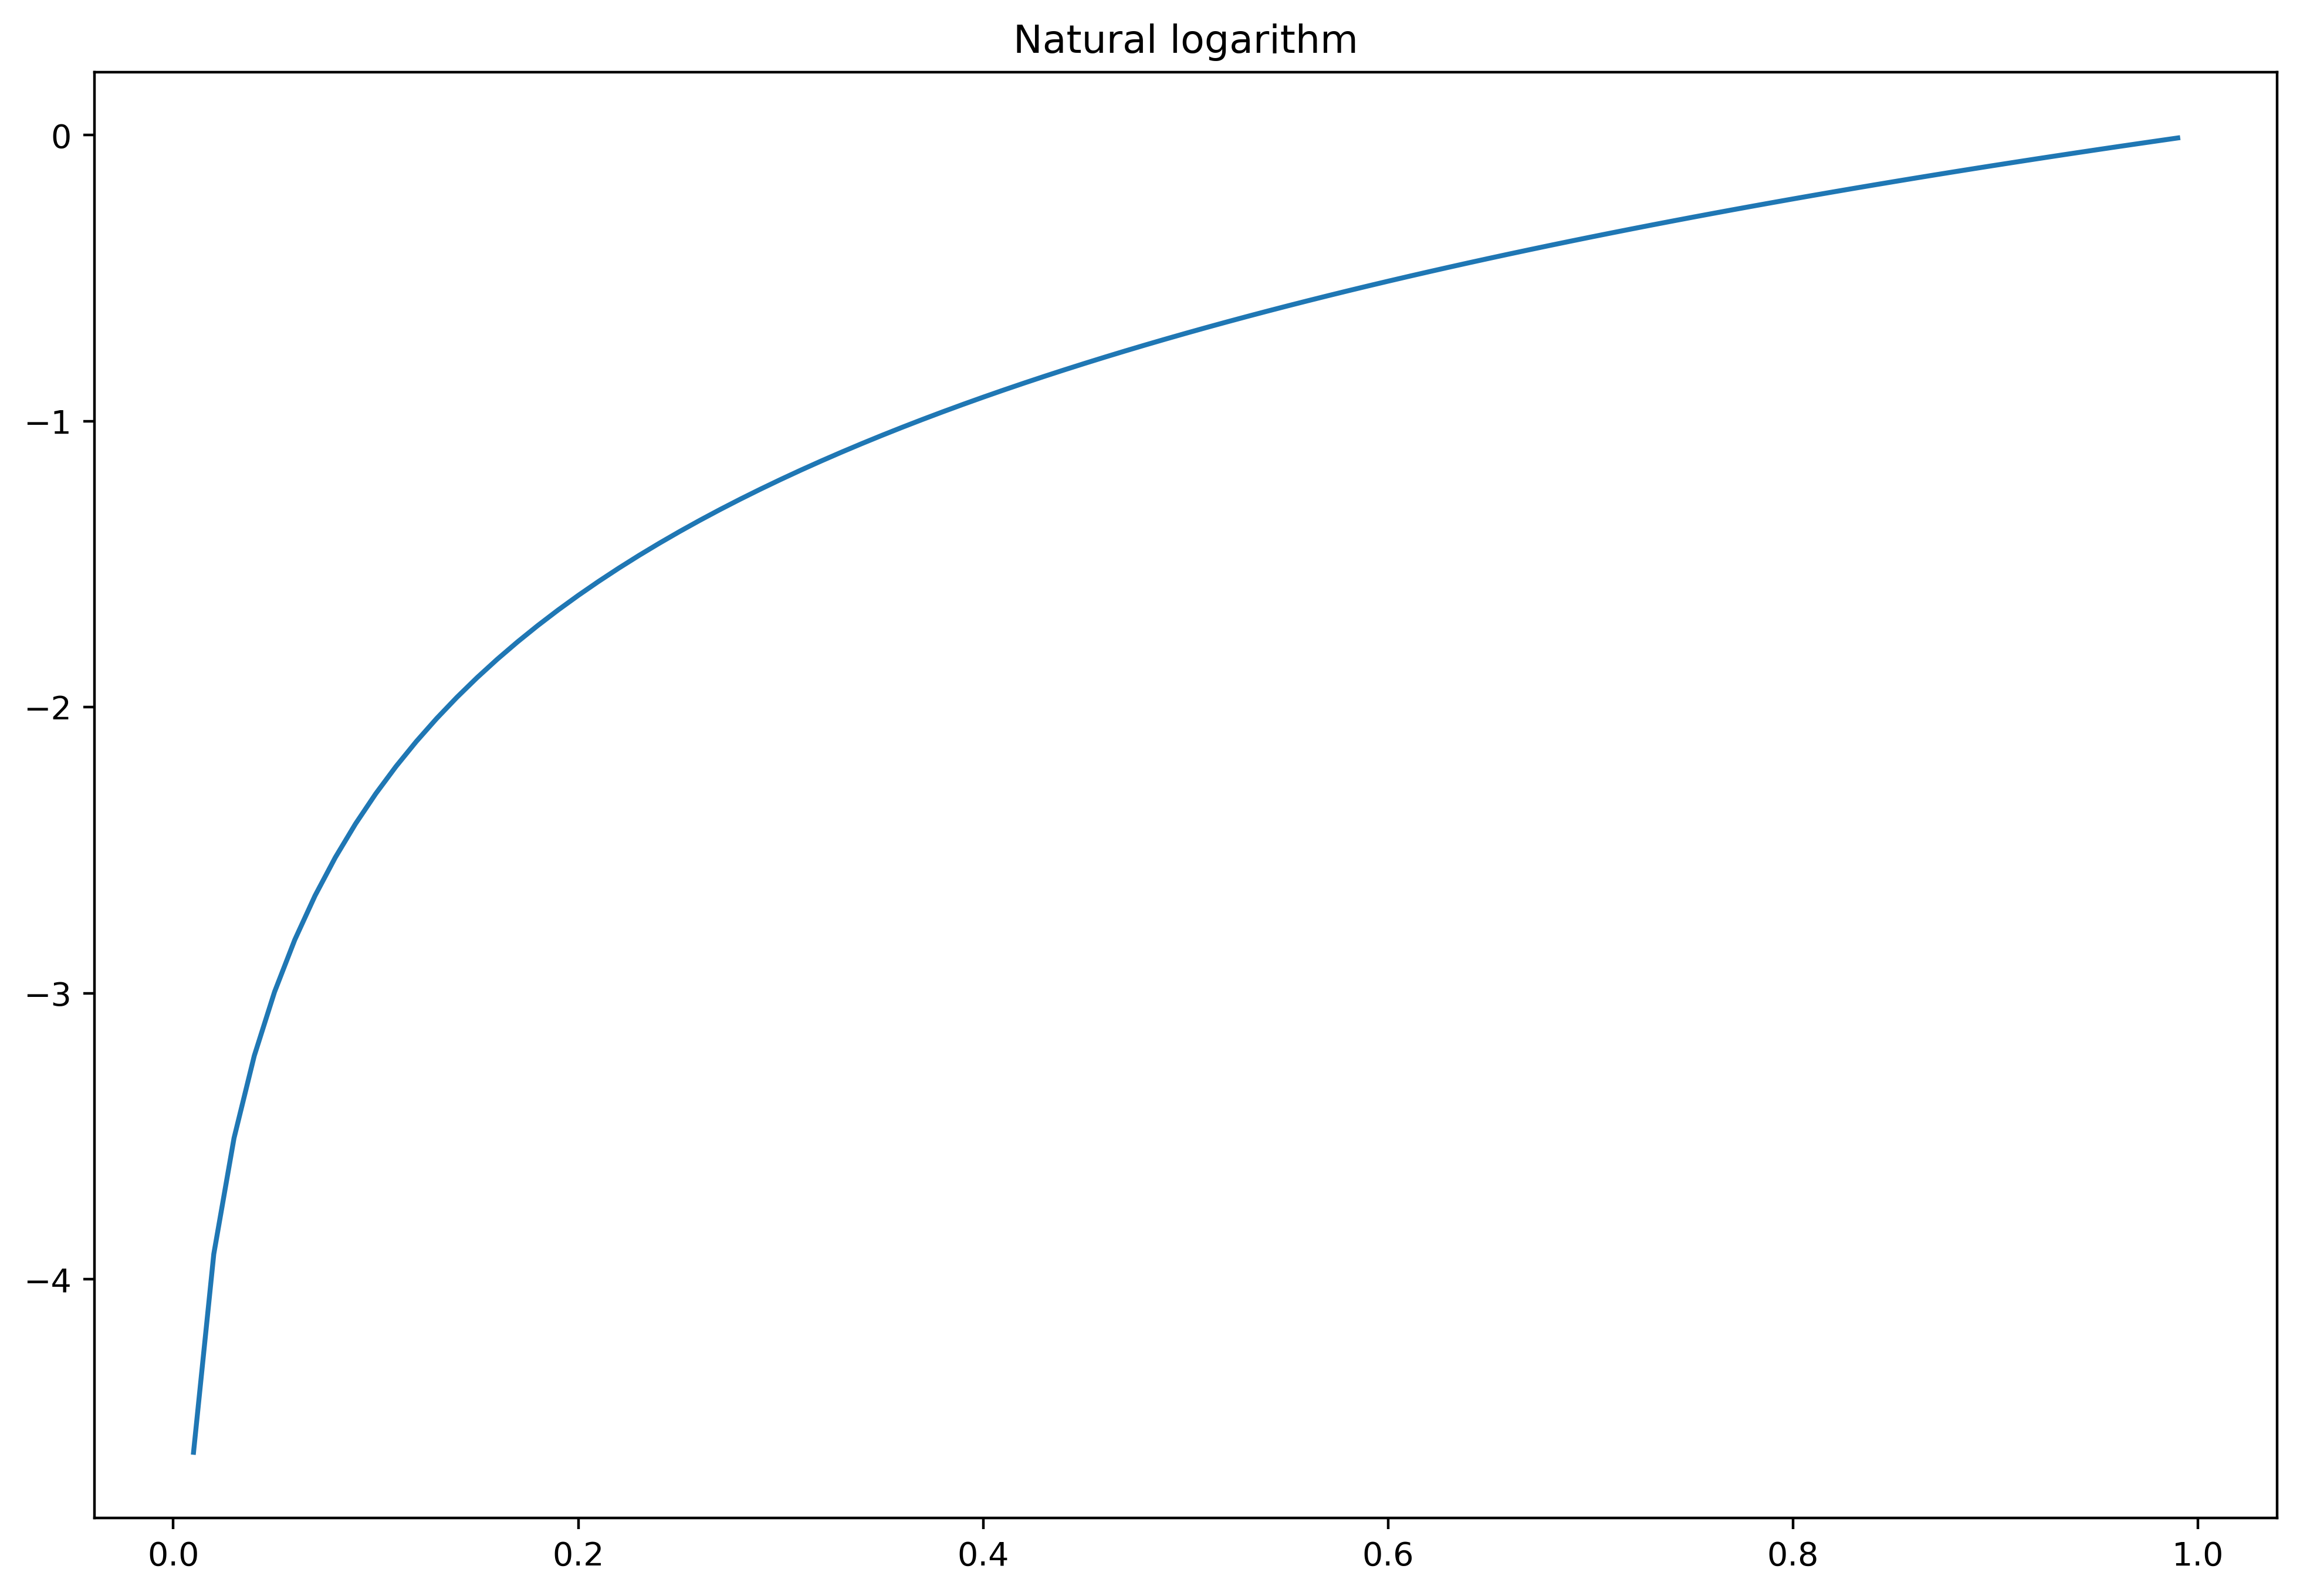

In [107]:
plt.figure(figsize=(12,8))
plt.plot(X_log, y_log)
plt.title('Natural logarithm')

#### Gradient Descent

The gradient points in the direction of steepest ascent. So, if you walk in the direction of the gradient, you will be going straight up the hill. Since we want to go down the hill in gradient descent we move in the direction of negative the gradient, the size of each step being the learning rate.

In [108]:
X_poly = np.linspace(-3,5,81)
print(X_poly[:5], '...', X_poly[-5:])

[-3.  -2.9 -2.8 -2.7 -2.6] ... [4.6 4.7 4.8 4.9 5. ]


In [109]:
def cost_function(X):
    return X*(X-2)              # x^2-2x = x(x-2)

Text(0.5, 1.0, 'Error surface')

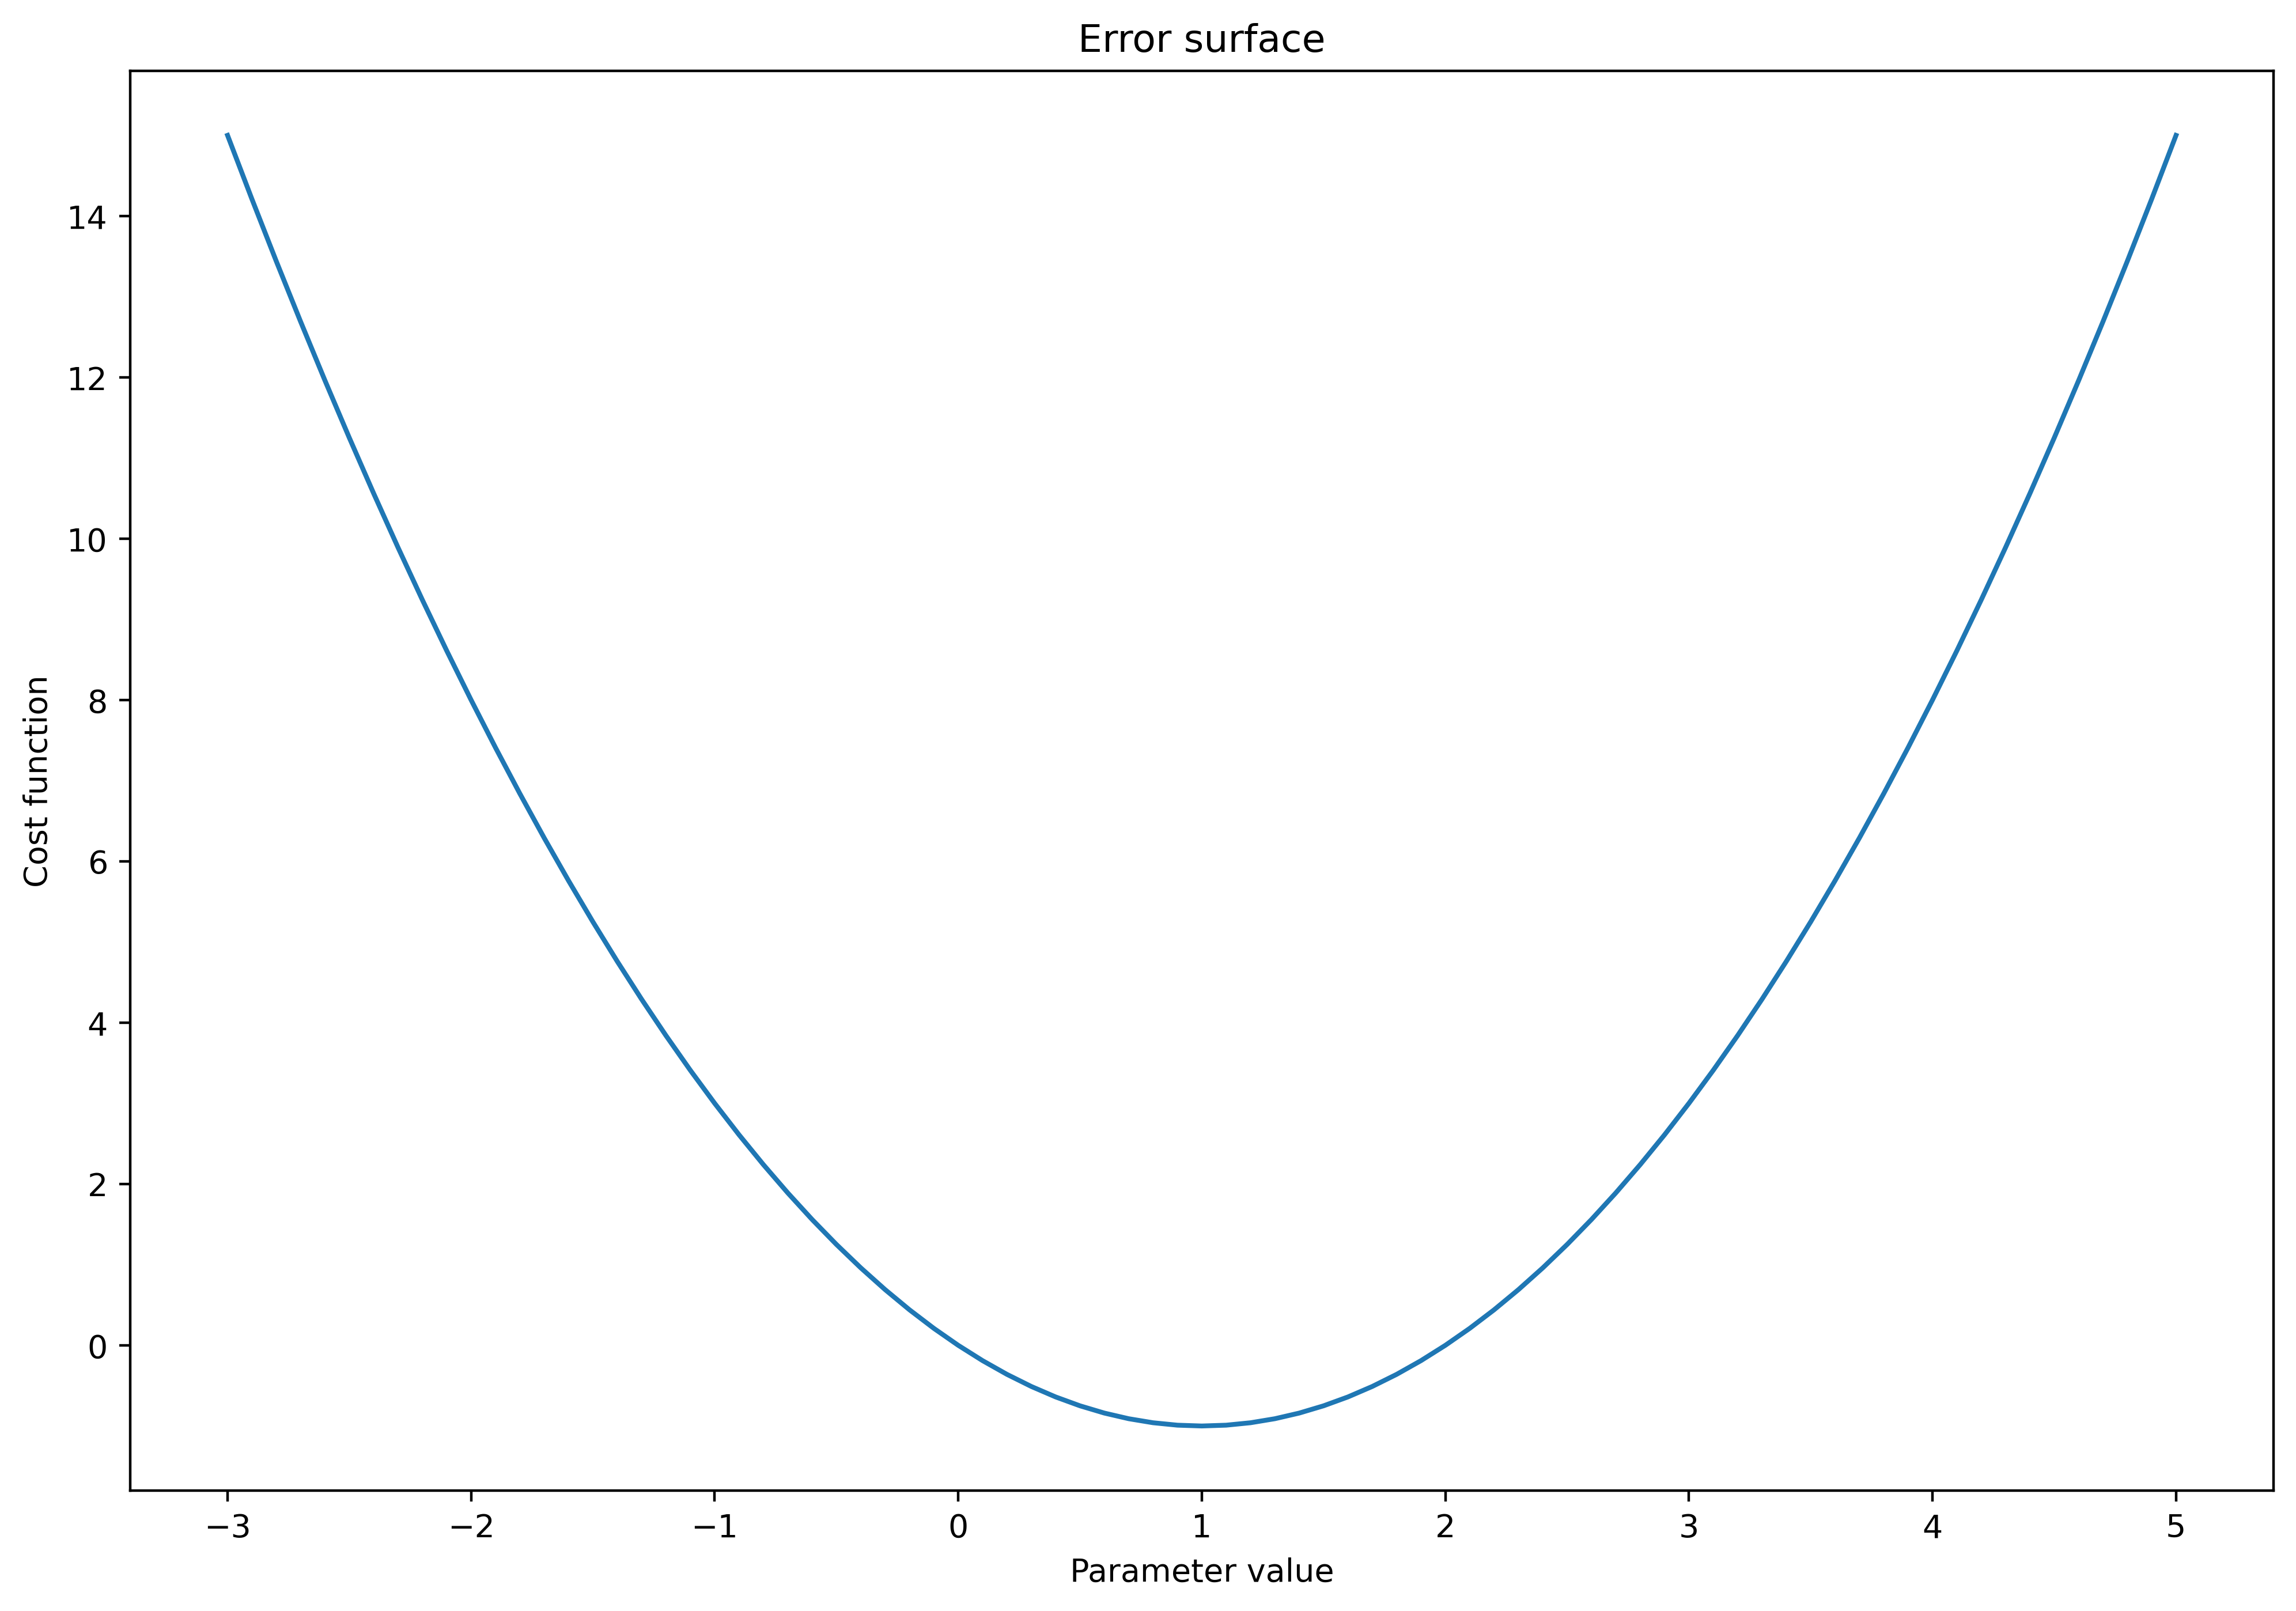

In [110]:
y_poly = cost_function(X_poly)
plt.figure(figsize=(12,8))
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')

In [111]:
def gradient(X):
    return (2*X) - 2

In [112]:
x_start = 4.5

In [113]:
learning_rate = 0.75

In [114]:
x_next = x_start - gradient(x_start)*learning_rate   # this is the gradient descent step
x_next

-0.75

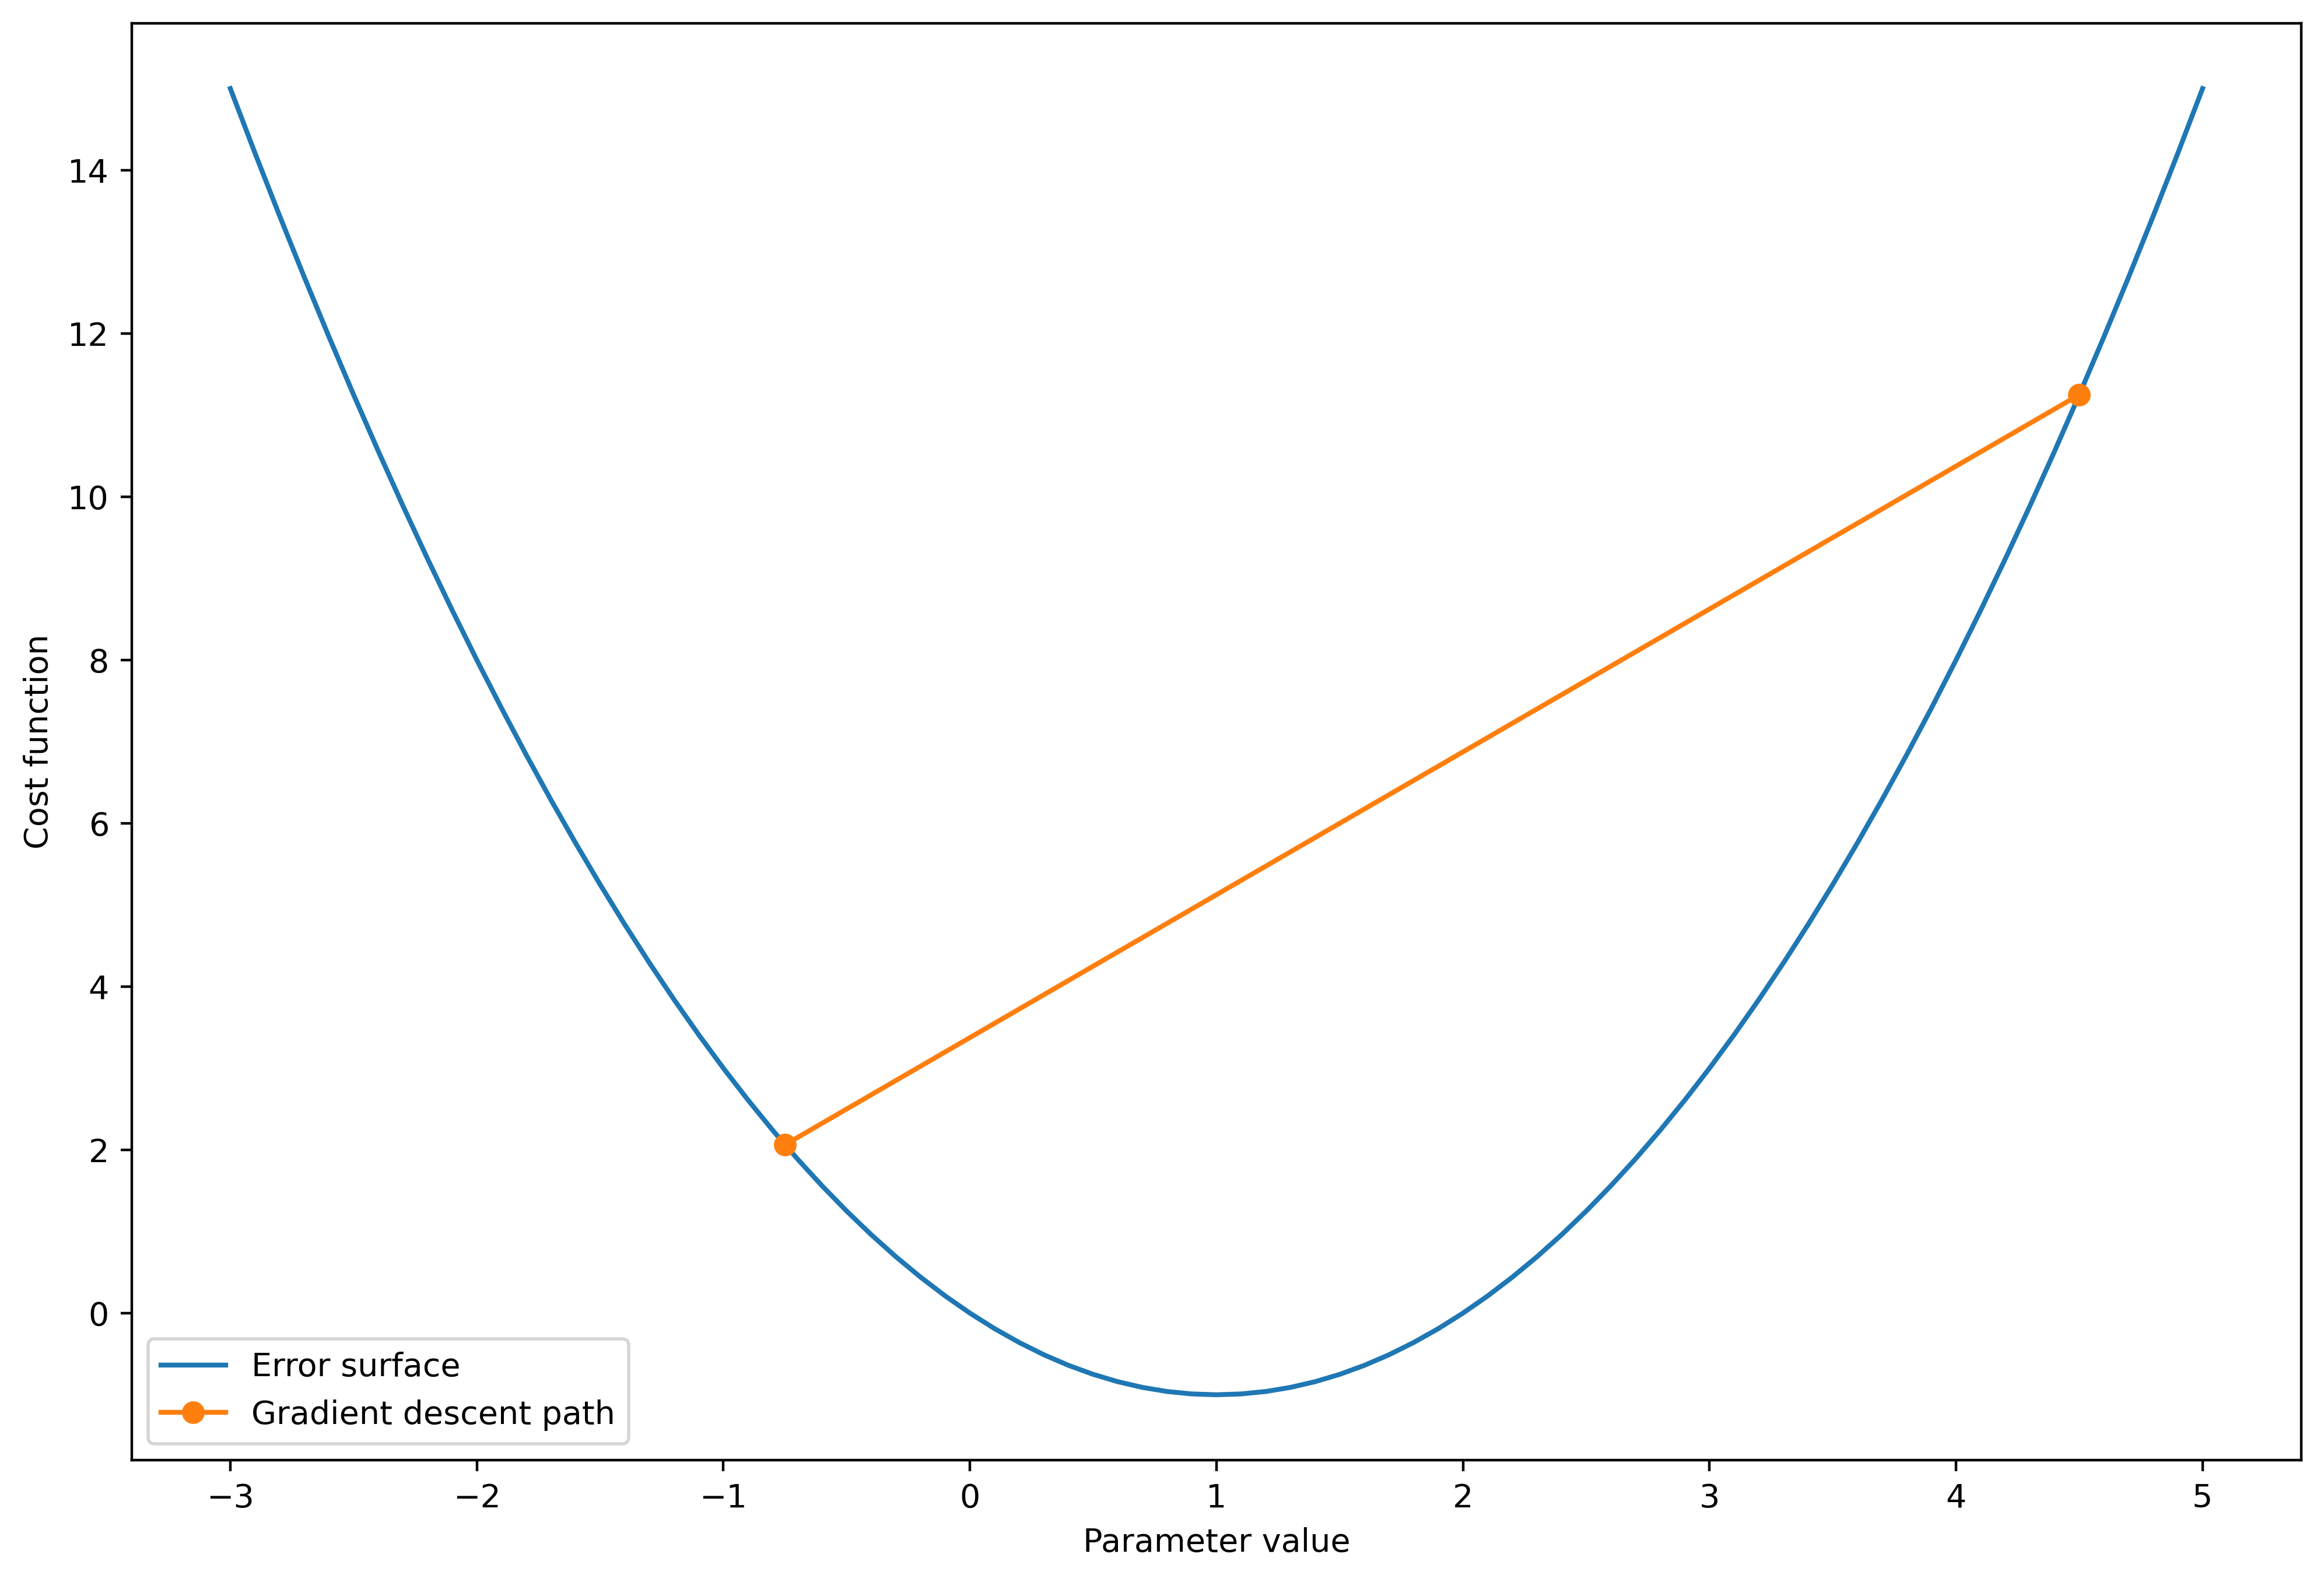

In [115]:
plt.figure(figsize=(12,8))
plt.plot(X_poly, y_poly)
plt.plot([x_start, x_next], [cost_function(x_start), cost_function(x_next)], '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])


In [116]:
iterations = 15
x_path = np.empty(iterations,)                  # empty data structure
x_path[0] = x_start                             # store initial
for iteration_count in range(1, iterations):    # 14 steps
    derivative = gradient(x_path[iteration_count-1])    # derivative at last point
    x_path[iteration_count] = x_path[iteration_count - 1] - (derivative*learning_rate) # next point

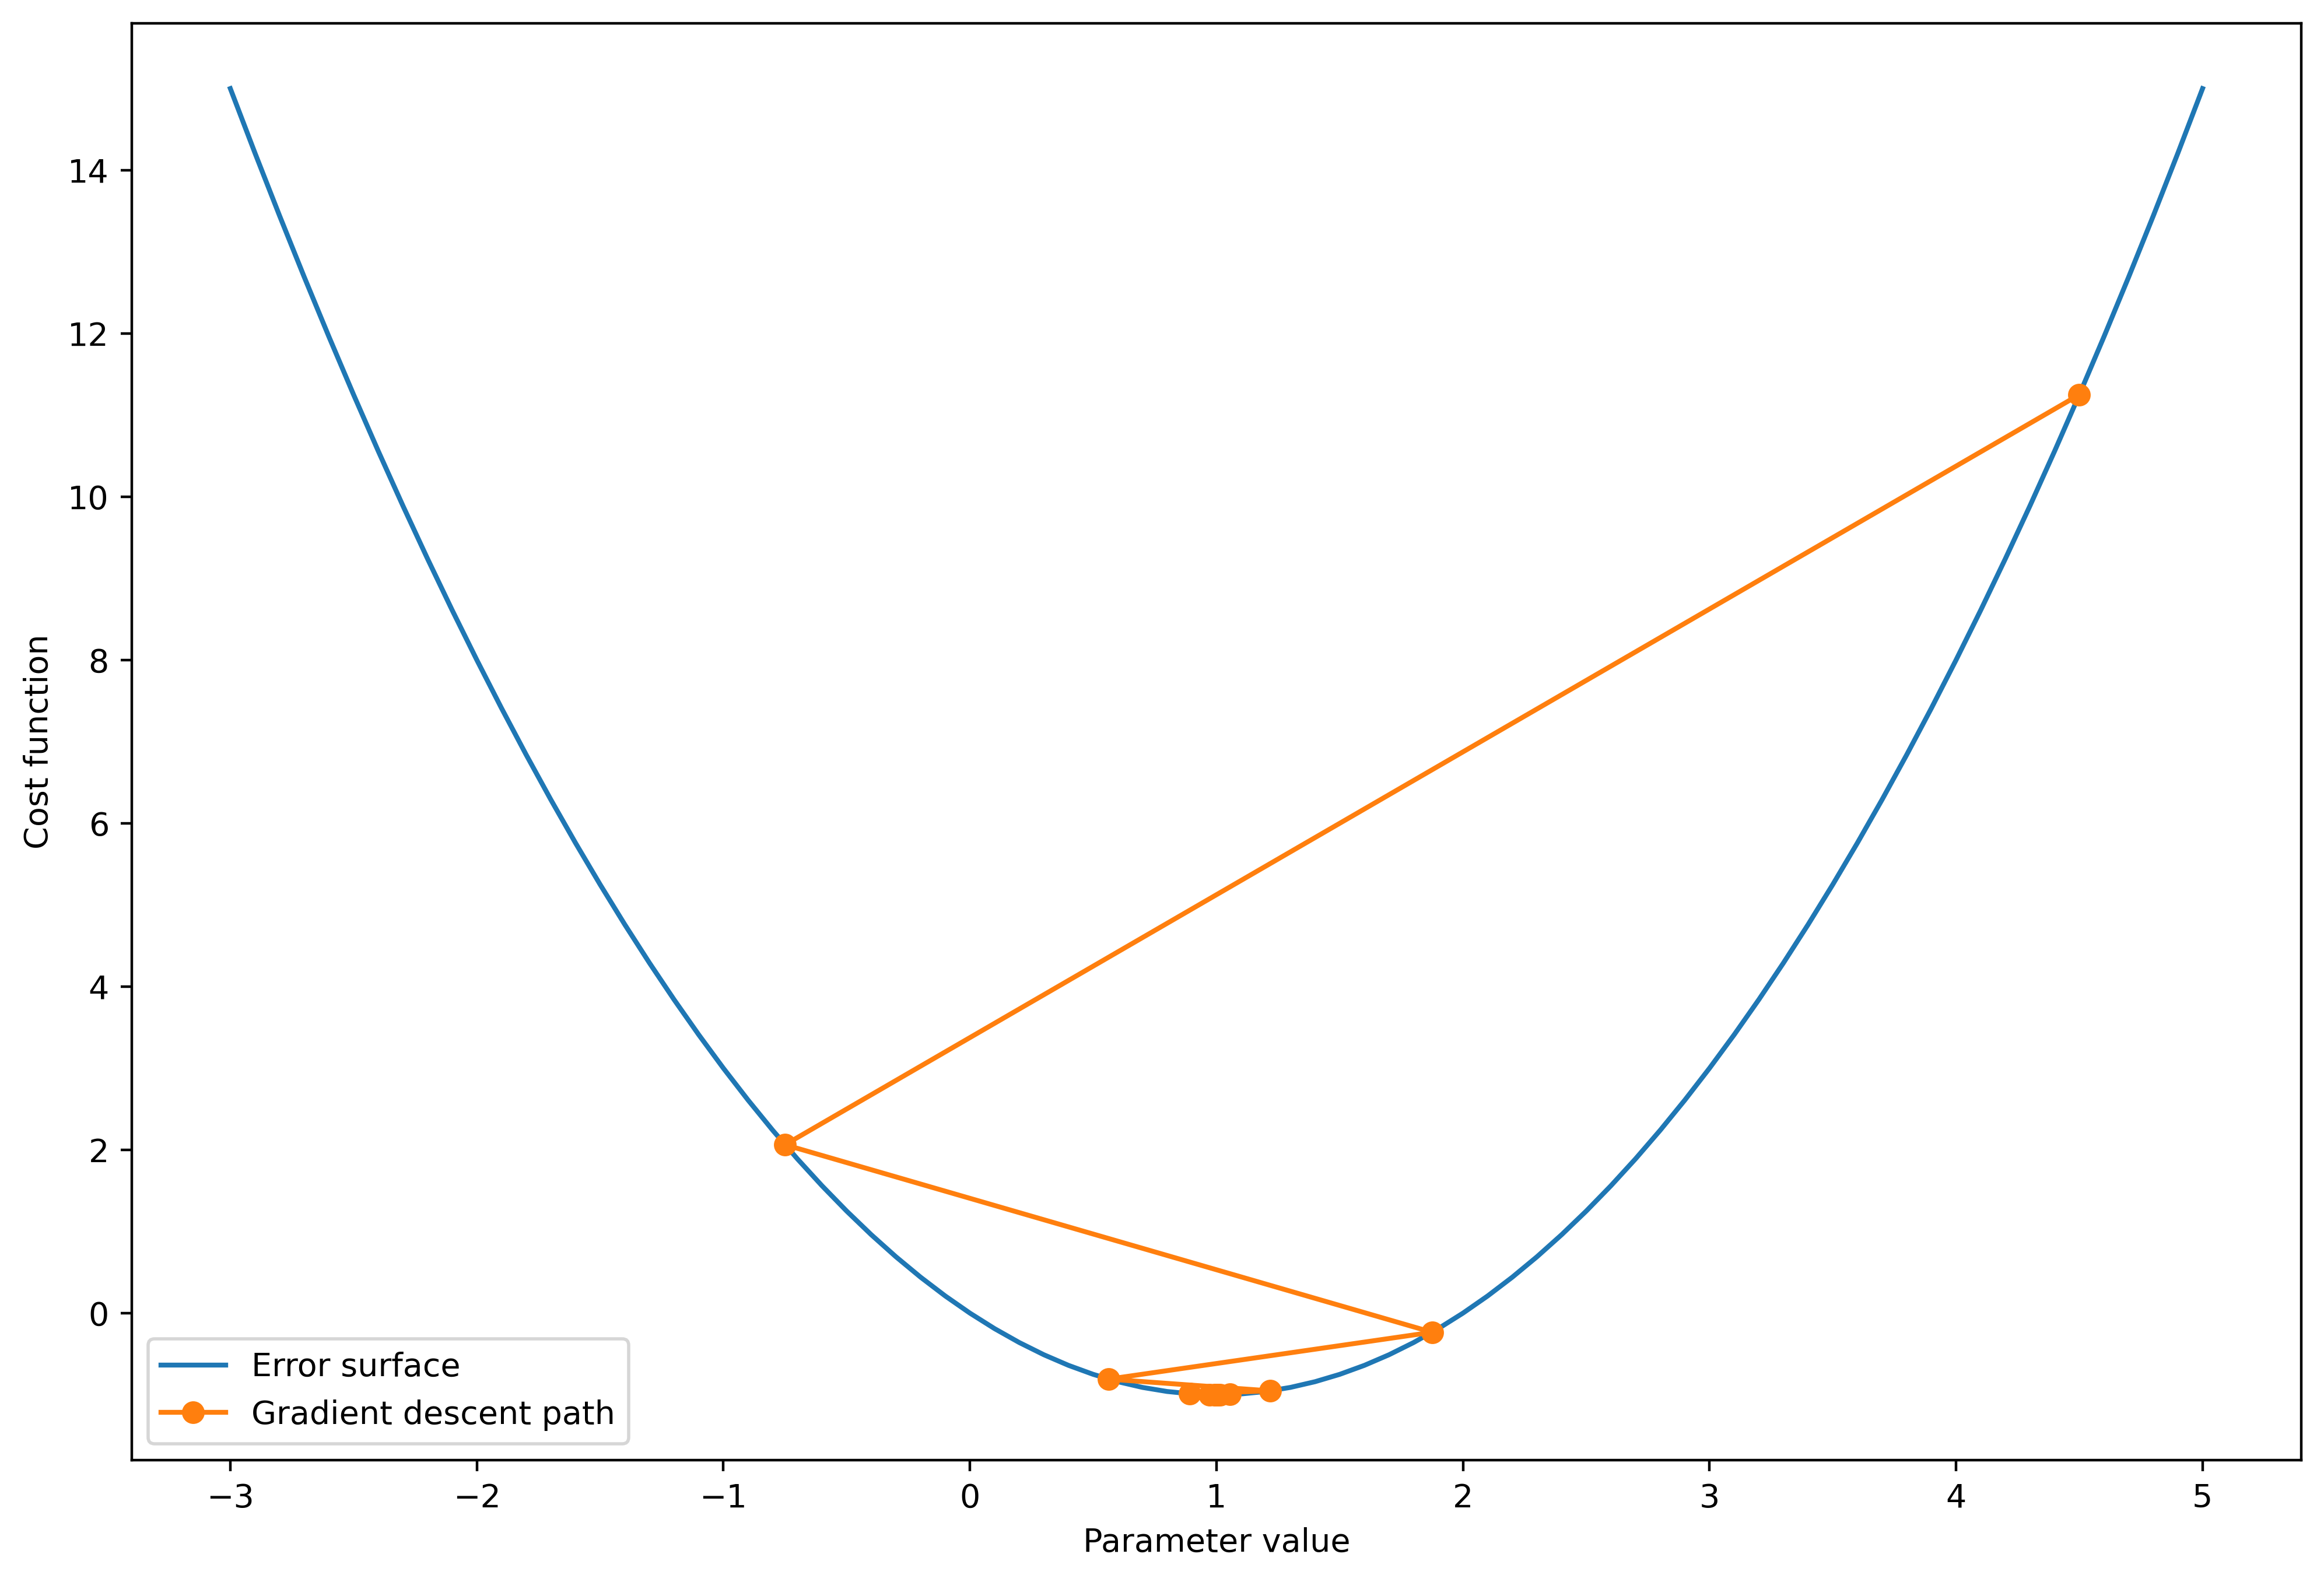

In [117]:
plt.figure(figsize=(12,8))
plt.plot(X_poly, y_poly)
plt.plot(x_path , cost_function(x_path), '-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])

#### Bias-Variance Trade-off

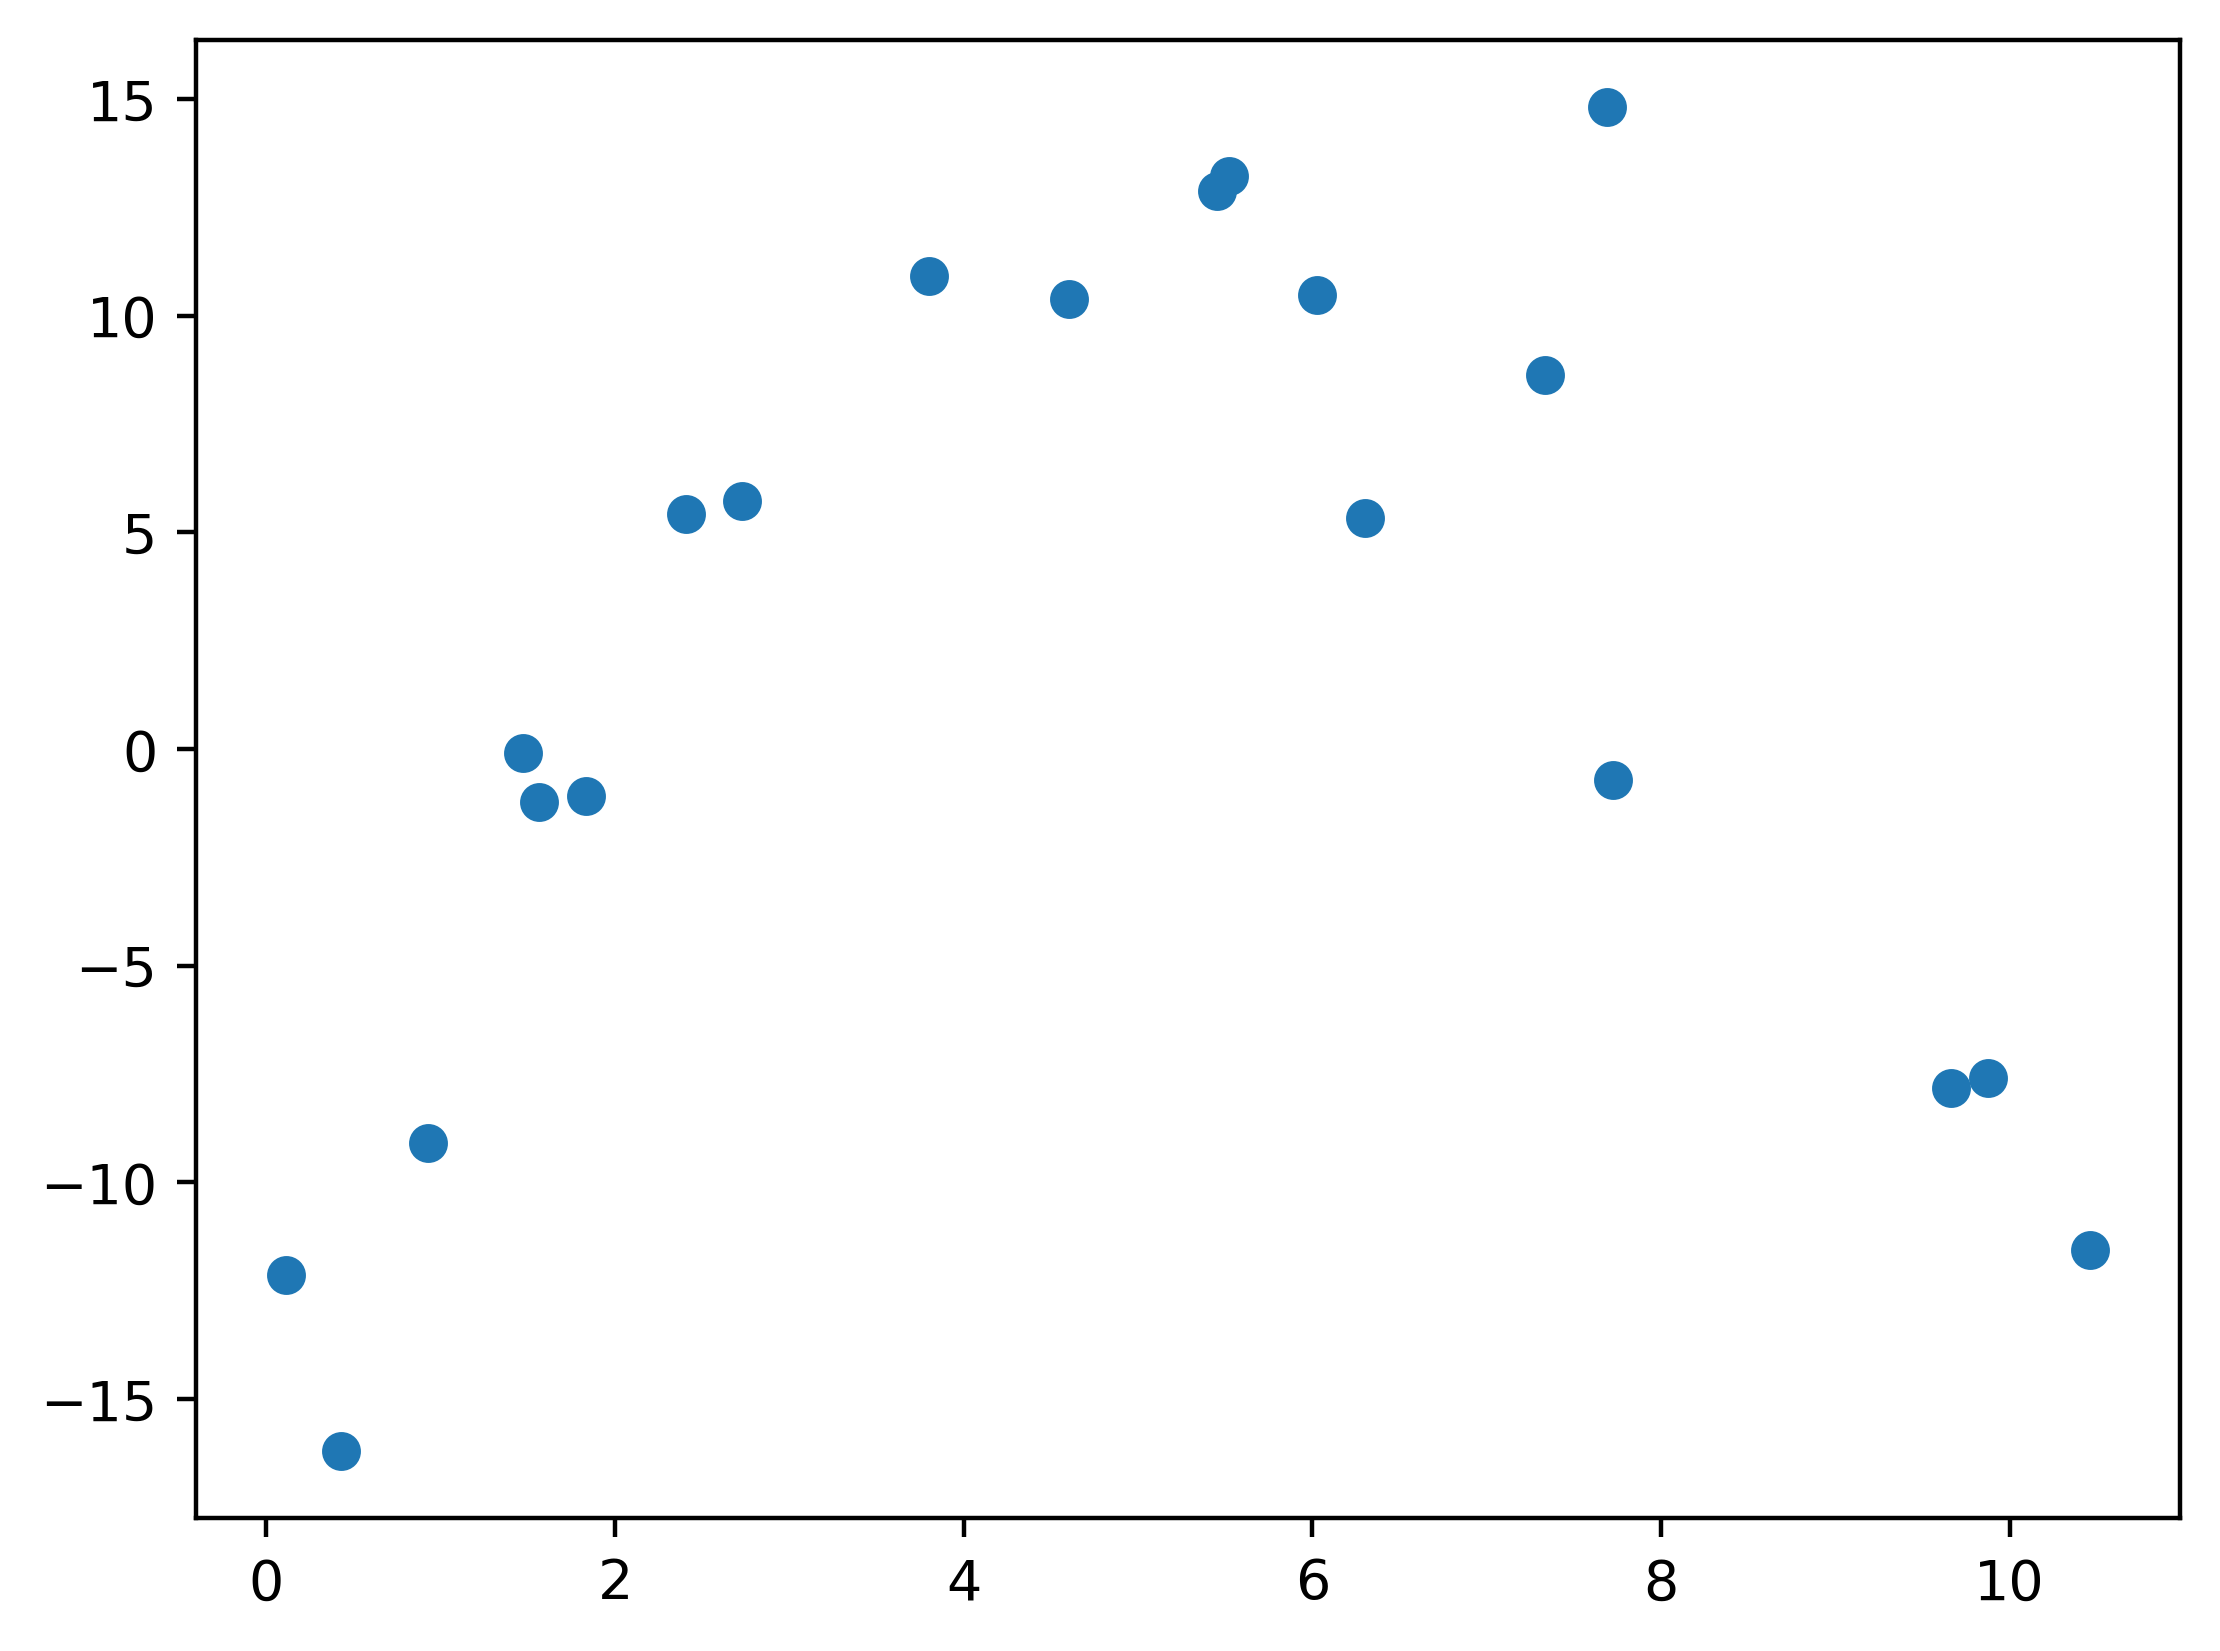

In [118]:
np.random.seed(seed=9)
n_points=20
X = np.random.uniform(0, 11, n_points)
X = np.sort(X)
Y = (-X+2)*(X-9) + np.random.normal(0,3,n_points)
plt.scatter(X,Y)

In [119]:
lin_fit = np.polyfit(X,Y,1)  # linear fit , degree is 1

In [120]:
def poly_fun(X,p):
    Y = np.zeros_like(X)
    power = len(p) - 1
    for coefficient in p:
        Y = Y + coefficient*X**power
        power = power - 1
    return Y

In [121]:
lin_fit

array([ 0.44464616, -0.61869372])

In [122]:
poly_fun(X, lin_fit)

array([-0.56795261, -0.42917123, -0.2075489 ,  0.03588094,  0.07638692,
        0.19702737,  0.45030033,  0.59479584,  1.07117738,  1.42827491,
        1.80618691,  1.83602902,  2.06083994,  2.18273629,  2.64318106,
        2.8007159 ,  2.81695454,  3.67843349,  3.77355591,  4.03257388])

In [123]:
curve_x = np.linspace(0, 11, 333)

In [124]:
cmap = mpl.colormaps.get_cmap('tab10')  # matplotlib colormap instance, with known matplotlib name

(-20.0, 20.0)

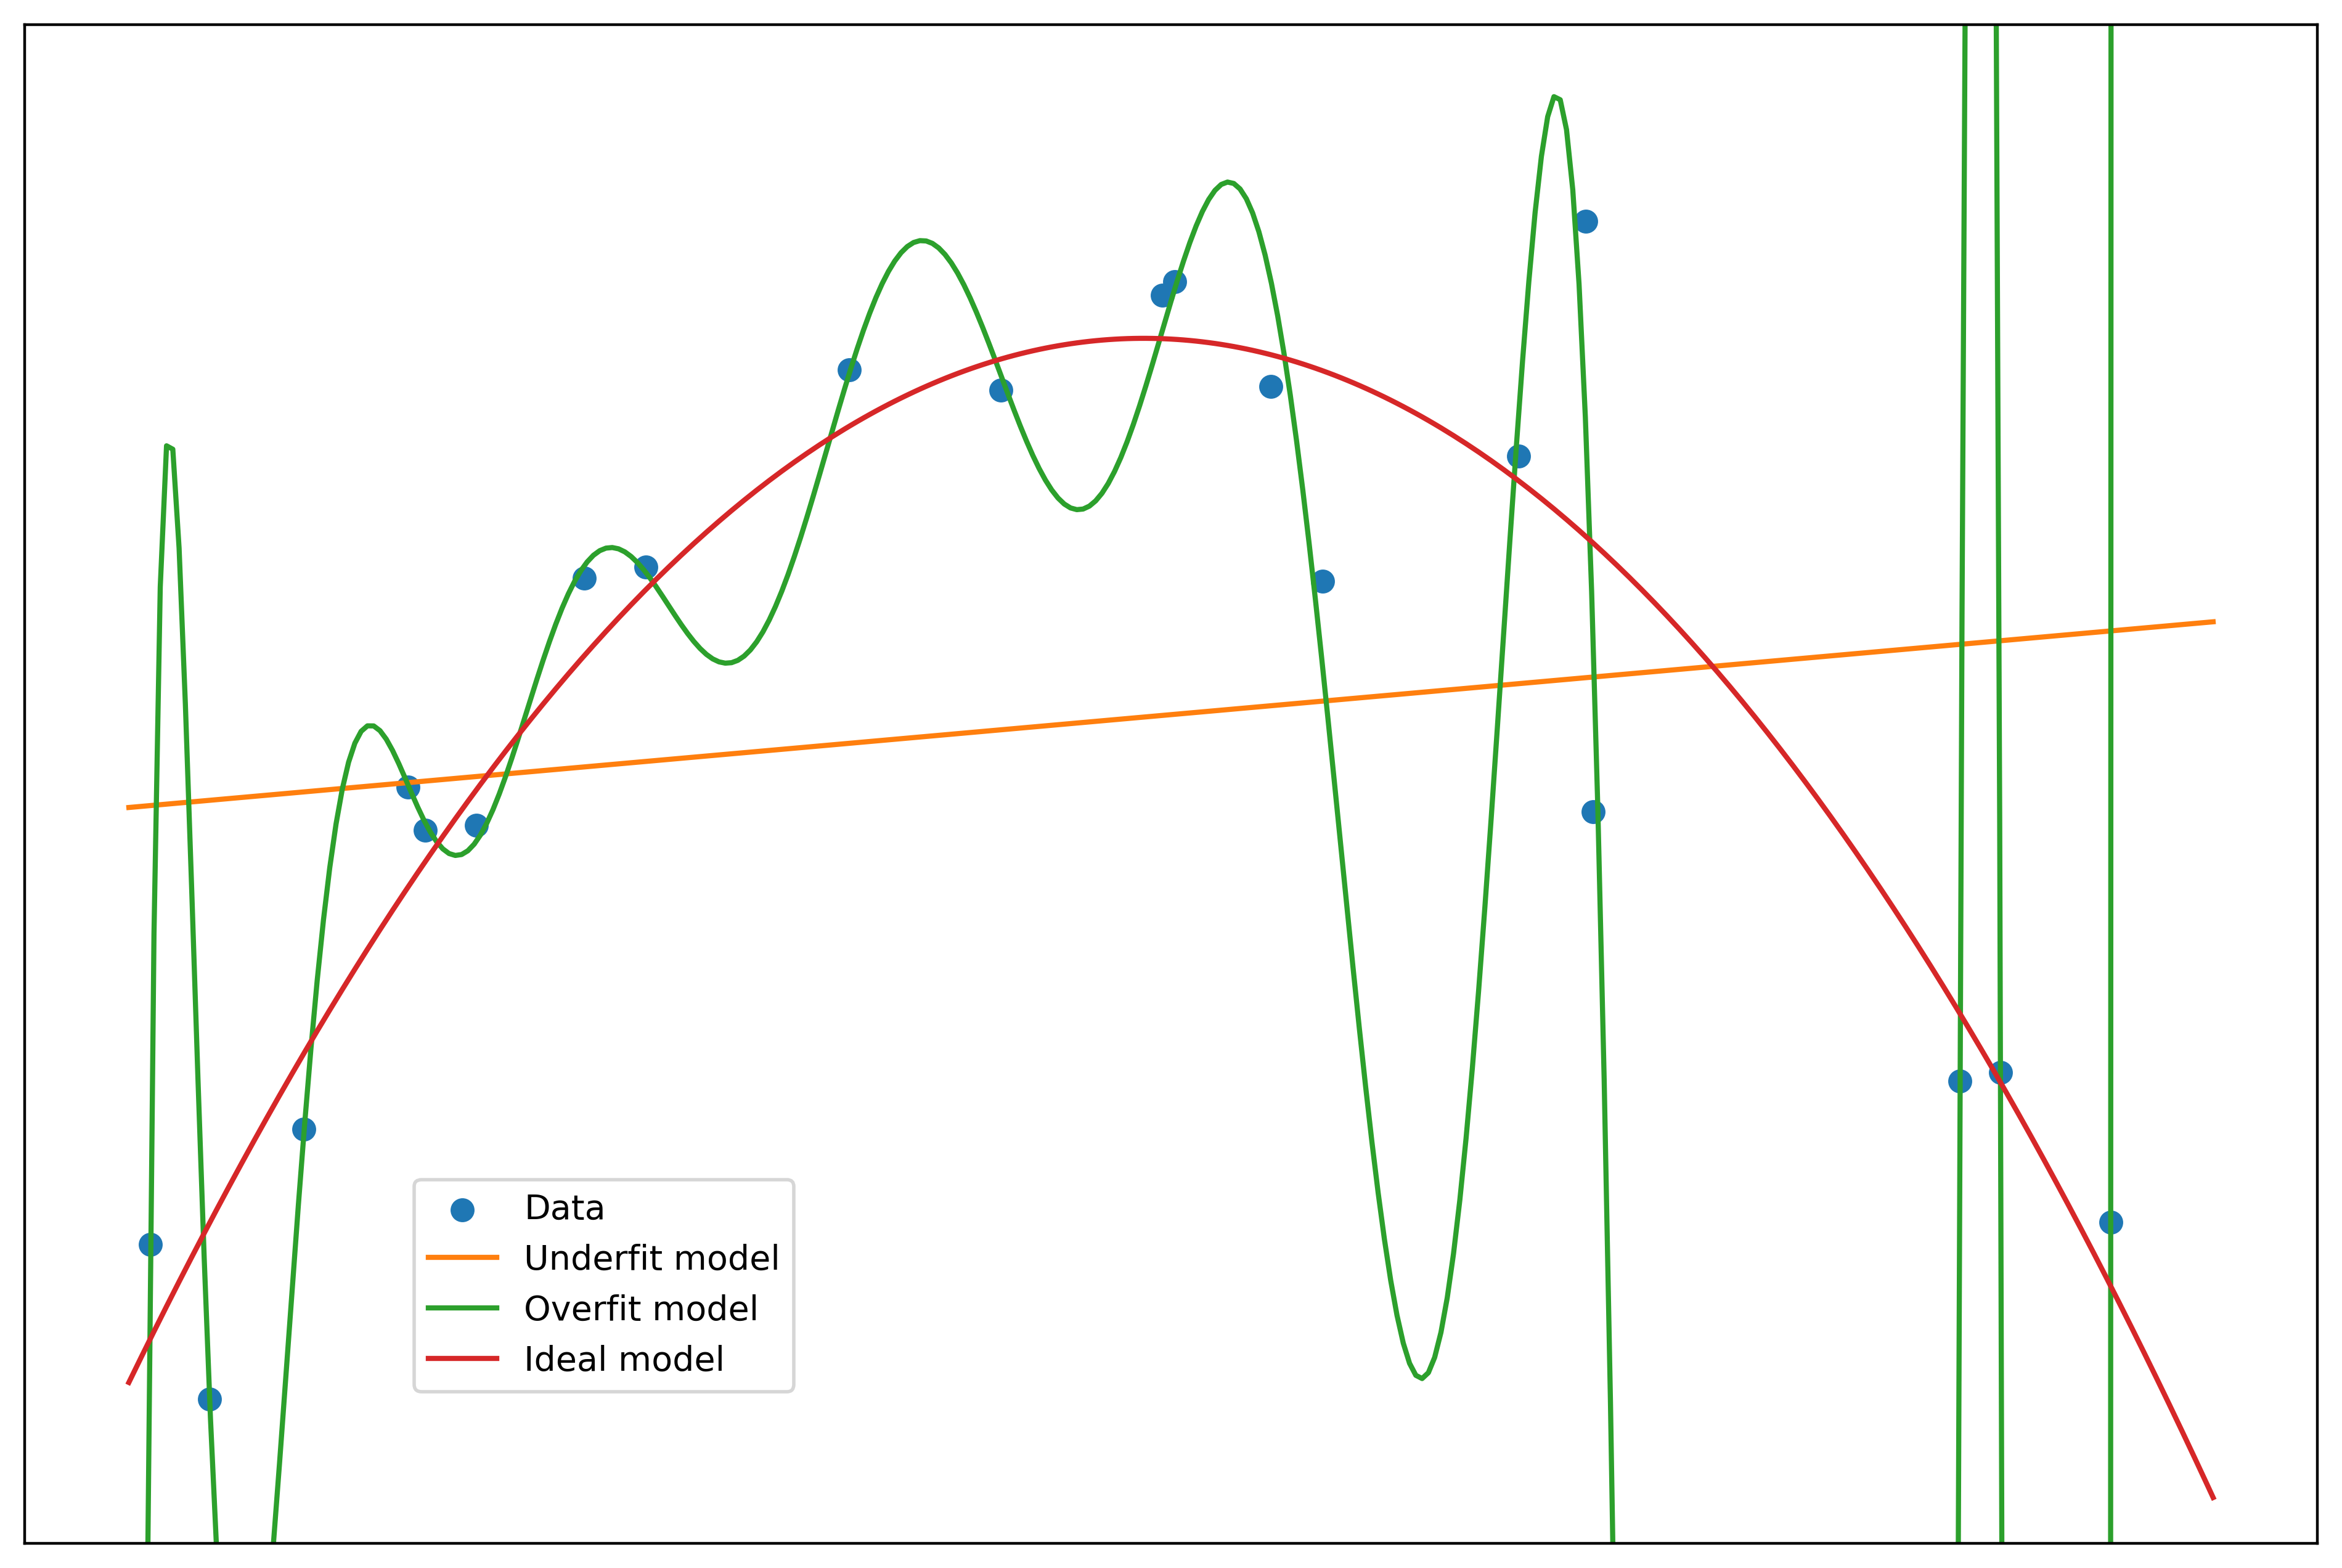

In [125]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x, lin_fit), label='Underfit model', color=cmap(1)) # linear is underfit
plt.plot(curve_x, poly_fun(curve_x, np.polyfit(X,Y,15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x, np.polyfit(X,Y,2)), label='Ideal model', color=cmap(3))
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

In [126]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [127]:
X_synthetic, y_synthetic = make_classification(n_samples=1000,n_features=200,
                                                n_informative=3, n_redundant=10,
                                                n_repeated=0, n_classes=2,
                                                n_clusters_per_class=2,
                                                weights=None, flip_y=0.01,
                                                class_sep=0.8, hypercube=True,
                                                shift=0.0, scale=1.0,
                                                shuffle=True, random_state=24)

In [128]:
print(X_synthetic.shape, y_synthetic.shape)

(1000, 200) (1000,)


In [129]:
print(np.mean(y_synthetic))

0.501


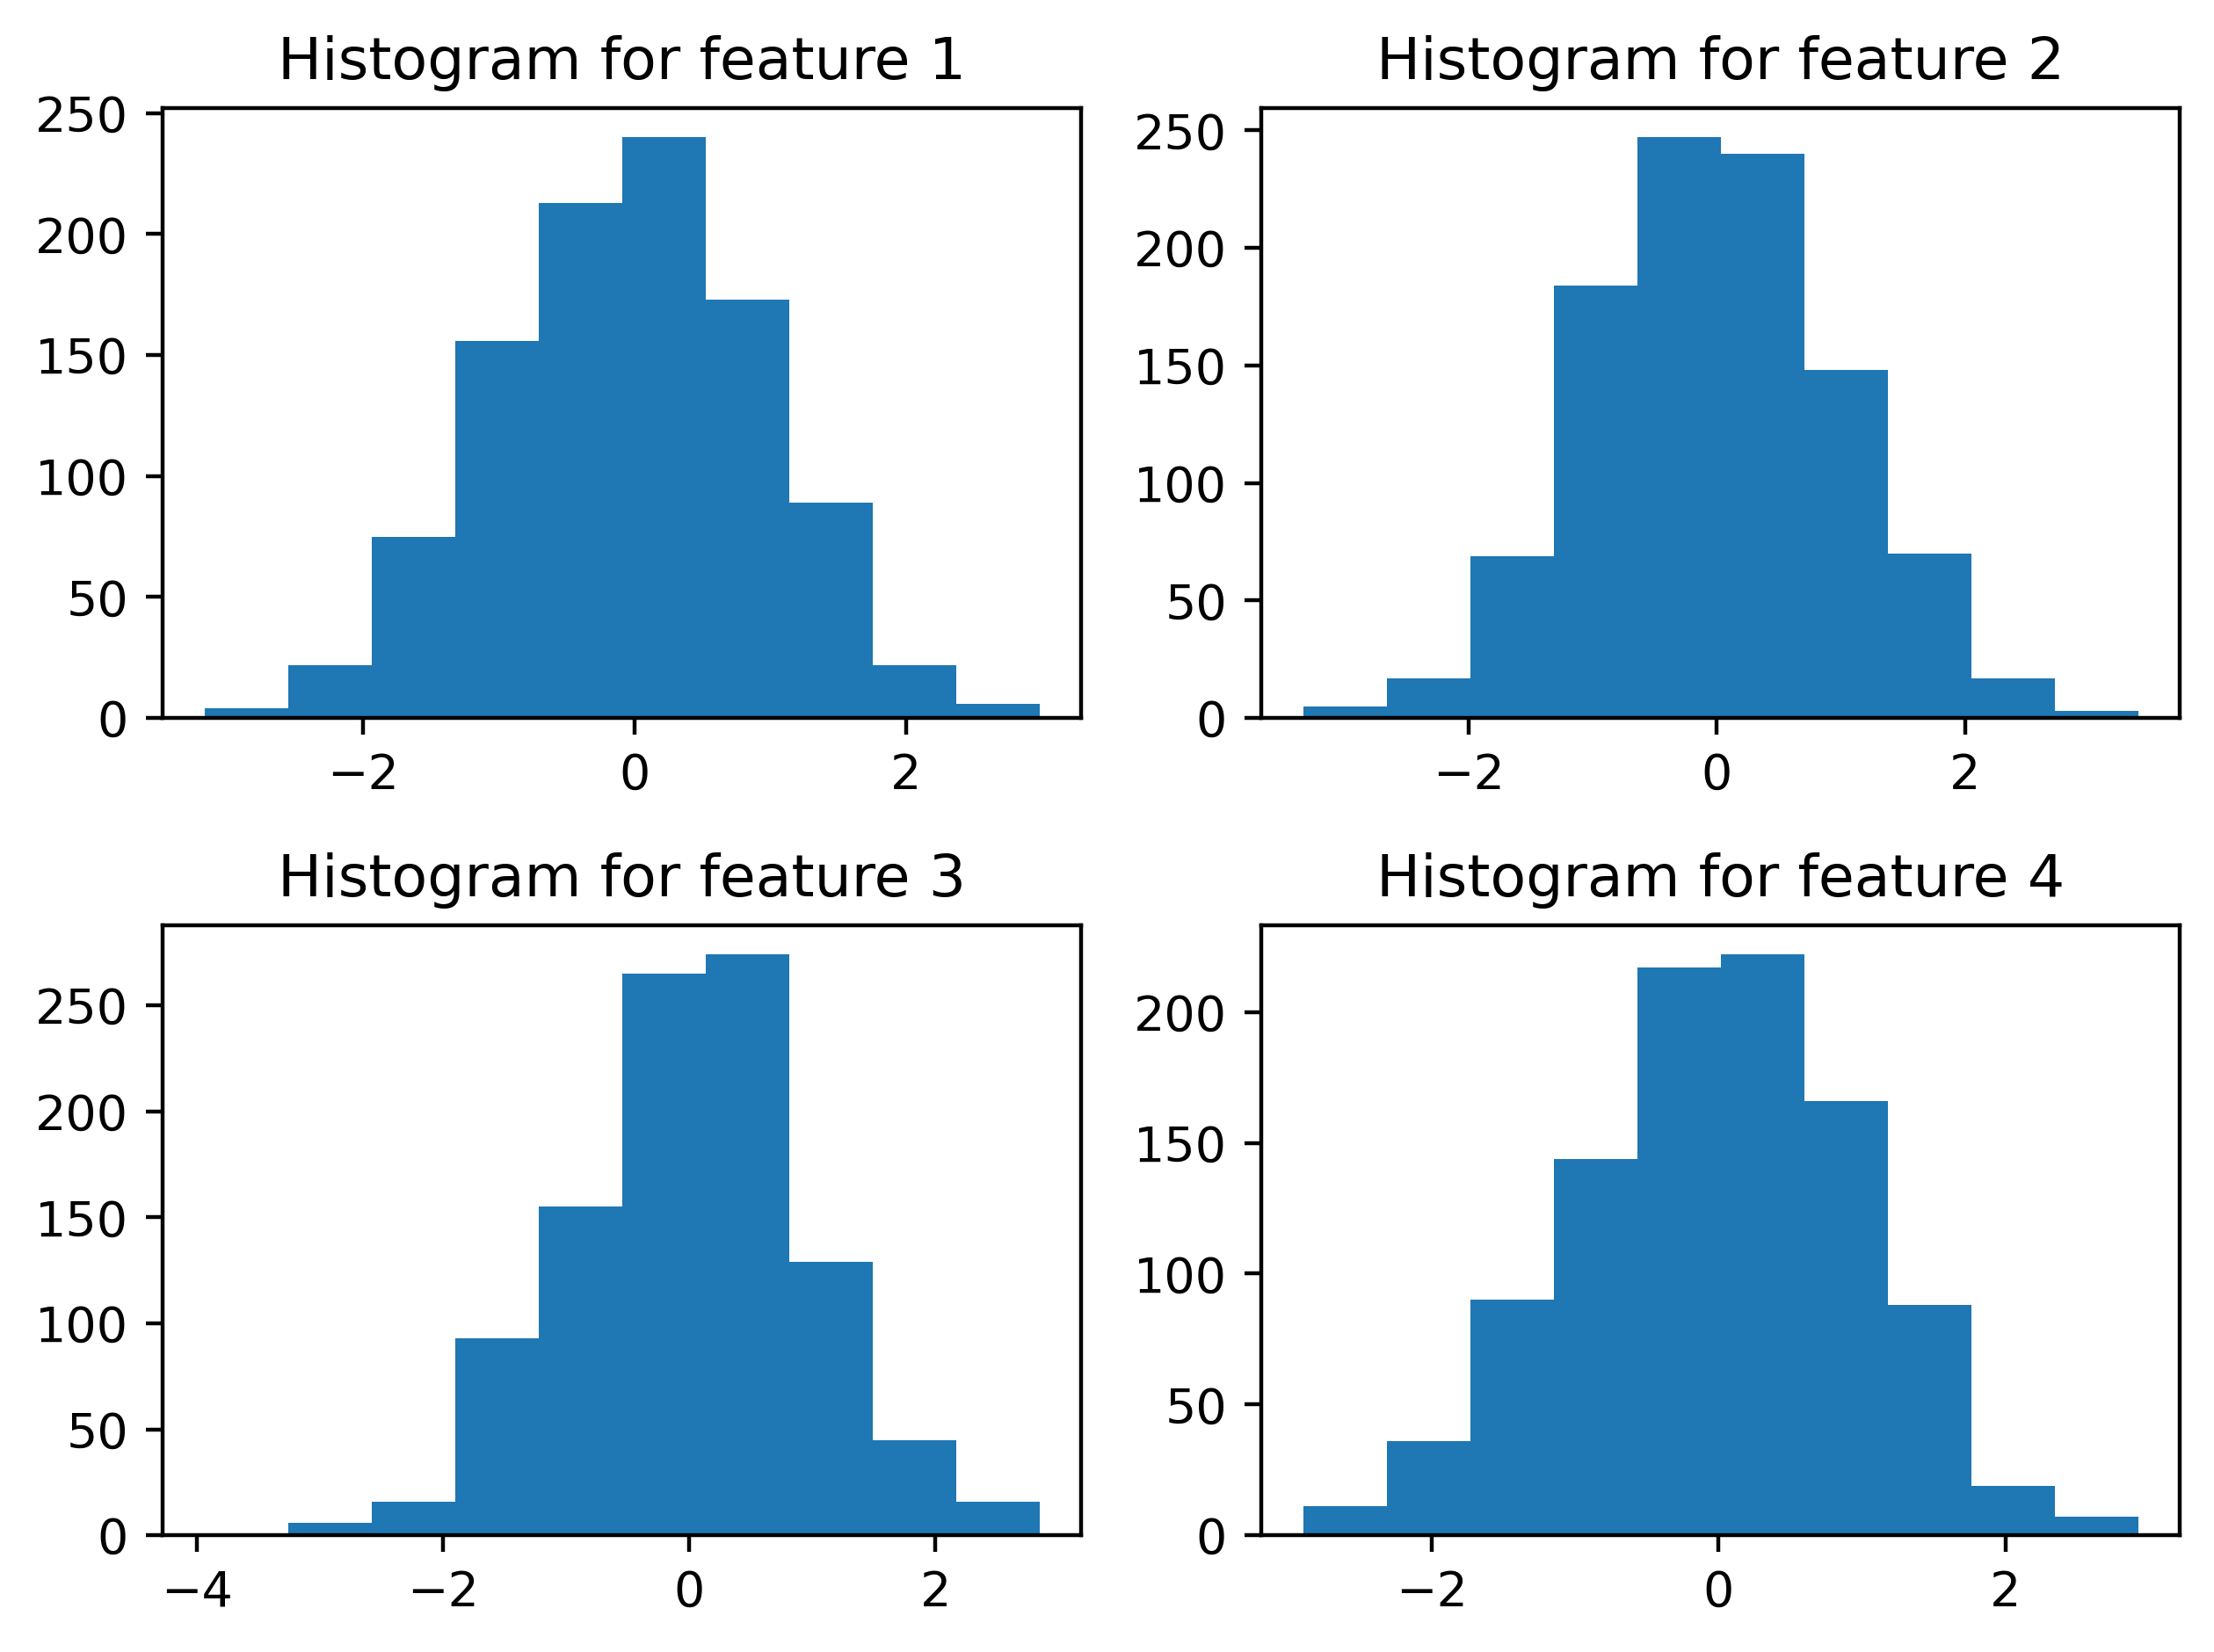

In [130]:
for plot_index in range(4):
    plt.subplot(2,2, plot_index + 1)
    plt.hist(X_synthetic[:,plot_index])
    plt.title(f'Histogram for feature {plot_index+1}')
plt.tight_layout()

In [131]:
X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_synthetic, 
                                                                    y_synthetic, 
                                                                    test_size=0.2,
                                                                    random_state=124)
lr_syn = LogisticRegression(solver='liblinear',
                            penalty='l1',
                            C=1000,
                            random_state=1)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [132]:
# receiver operating characteristic area under curve using probability of positive class membership
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1]) # training labels and prob of positive class

0.9421567156715671

In [133]:
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.8076190476190477

In the synthetic data binary classification challenge, above, we choose to evaluate using the roc_auc_score which gives 0.94 for the training data and 0.80 for the test data. This significant difference between train and test performance suggests that our model is overfit to the training data ie high variance (memorized all the variation in the training data and as such is sensitive to the variation in the test data).

#### Lasso (L1) and Ridge (L2) Regularization

In [134]:
poly_features = X.reshape(20,-1)
plot_features = curve_x.reshape(333,-1)
for power in range(2,16):
    power_array = X.reshape(20,-1)**power
    poly_features = np.append(poly_features, power_array.reshape(20,-1), axis=1) # append power to poly columns
    plot_power_array = curve_x.reshape(333, -1)**power # after reshape, raise each element to power
    plot_features = np.append(plot_features, plot_power_array.reshape(333,-1), axis=1)

In [135]:
from sklearn.linear_model import Ridge, Lasso # Linear least squares with l2 regularization.

In [136]:
regressor = Ridge(alpha=0.001, 
                  fit_intercept=True, 
                  copy_X=True, 
                  max_iter=None, 
                  tol=0.001, 
                  random_state=1)

In [137]:
regressor.fit(poly_features, Y)

Ridge(alpha=0.001, random_state=1, tol=0.001)

In [138]:
Y_pred = regressor.predict(plot_features)

(-20.0, 20.0)

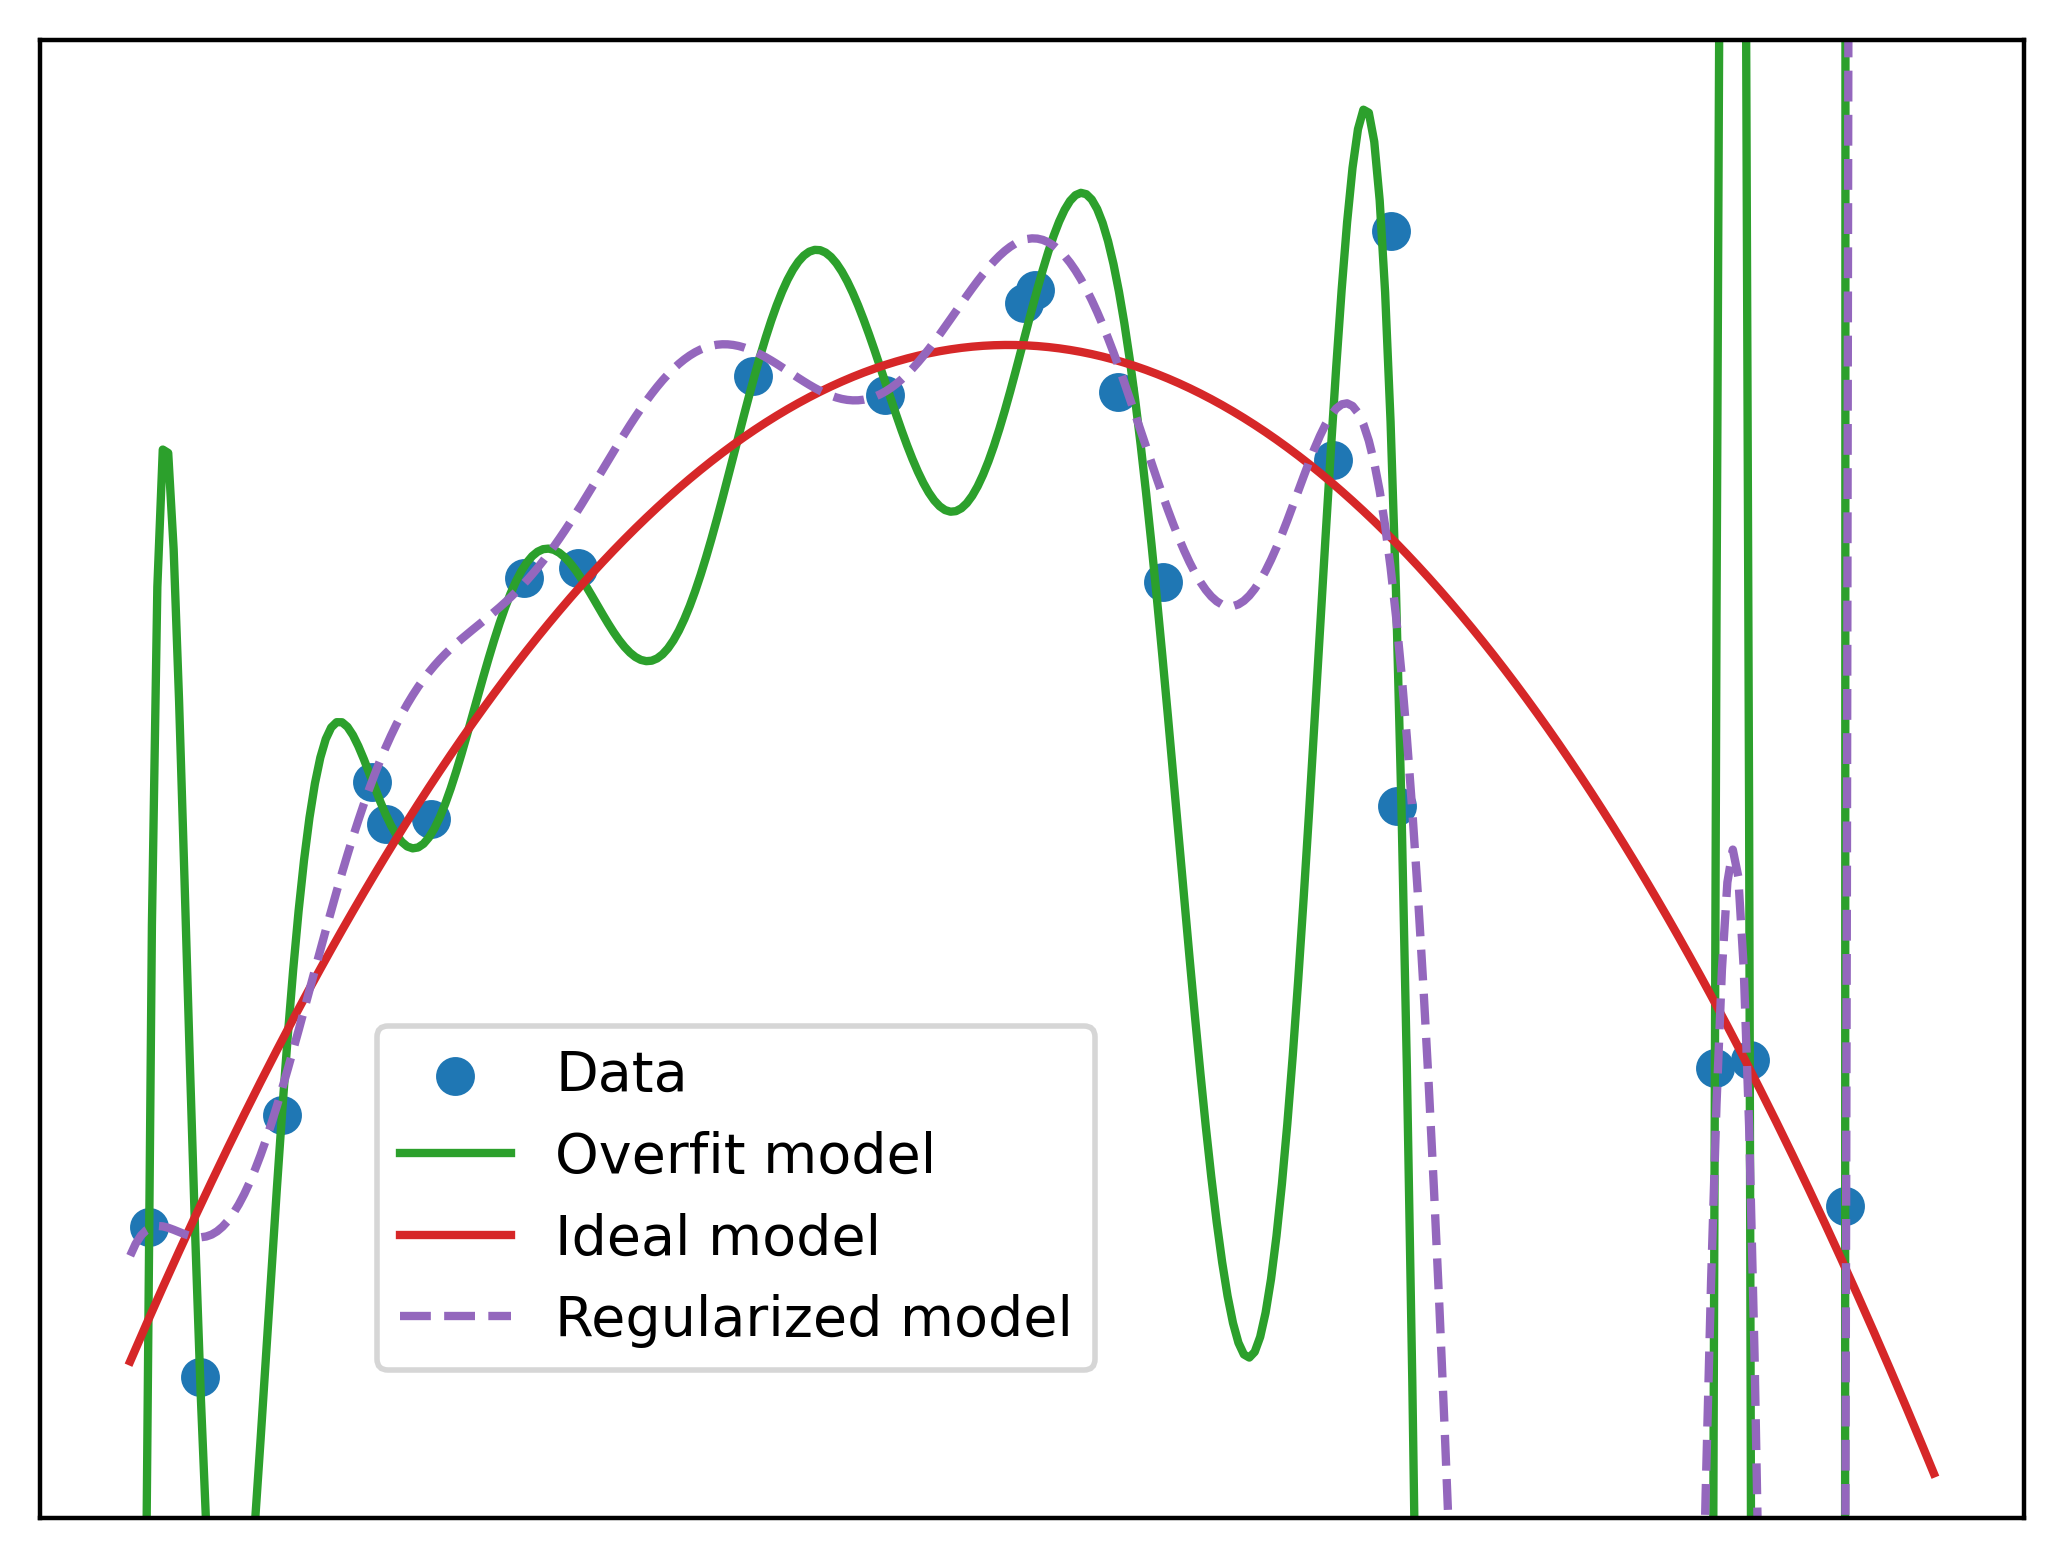

In [139]:
plt.scatter(X, Y, label='Data', color=cmap(0))
plt.plot(curve_x, poly_fun(curve_x, np.polyfit(X,Y,15)), label='Overfit model', color=cmap(2))
plt.plot(curve_x, poly_fun(curve_x, np.polyfit(X,Y,2)), label='Ideal model', color=cmap(3))
plt.plot(curve_x, Y_pred, label='Regularized model', color=cmap(4), linestyle='--')
plt.legend(loc=[0.17, 0.1])
plt.xticks([])
plt.yticks([])
plt.ylim([-20, 20])

#### Cross-Validation: Choosing the regularization parameter

In [140]:
from sklearn.model_selection import StratifiedKFold, KFold

In [141]:
n_folds = 4
k_folds = KFold(n_splits=n_folds, shuffle=False)    # initialize with  number of folds

In [142]:
# calling the split on the kfold object yields an iterator
for train_index, test_index in k_folds.split(X_syn_train, y_syn_train):
    print('train split', train_index[0], train_index[-1], '\n')
    print('test split', test_index[0], test_index[-1], '\n')

train split 200 799 

test split 0 199 

train split 0 799 

test split 200 399 

train split 0 799 

test split 400 599 

train split 0 599 

test split 600 799 



In [143]:
# Stratified k-fold to ensure consistent class distribution 
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=False)
for train_index, test_index in k_folds.split(X_syn_train, y_syn_train):
    print('train split', train_index[0], train_index[-1], '\n')
    print('test split', test_index[0], test_index[-1], '\n')

train split 187 799 

test split 0 212 

train split 0 799 

test split 187 414 

train split 0 799 

test split 389 604 

train split 0 604 

test split 596 799 



In [144]:
# Stratified k-fold with shuffling
k_folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=1) # arguments are also attributes
for train_index, test_index in k_folds.split(X_syn_train, y_syn_train):
    print('train split', train_index[0], train_index[-1], '\n')
    print('test split', test_index[0], test_index[-1], '\n')

train split 0 798 

test split 1 799 

train split 0 799 

test split 6 798 

train split 0 799 

test split 4 794 

train split 1 799 

test split 0 786 



##### Hyperparameter tuning

In [145]:
# define the expoenents (to be used as powers of 10)
C_val_exponents = np.linspace(3, -3, 13) # includes points on the log scale that are half way between
C_val_exponents

array([ 3. ,  2.5,  2. ,  1.5,  1. ,  0.5,  0. , -0.5, -1. , -1.5, -2. ,
       -2.5, -3. ])

In [146]:
# define the powers of 10
C_vals = float(10)**C_val_exponents
C_vals      # includes

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [147]:
from sklearn.metrics import roc_curve

In [148]:
# function for performing cross-validations
def cross_val_C_search(k_folds, C_vals, model, X, Y):

    n_folds = k_folds.n_splits    # the n_folds used to initialize the kfold object stored in n_splits attribute
    cv_train_roc_auc = np.empty((n_folds, len(C_vals))) # for each C_val, roc_auc for each n_fold, train split
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))  # for each C_val, roc_auc for each n_fold, test split
    # store tpr, fpr, thresholds for each value of C
    cv_test_roc = [] # C_vals inner lists for each C, inverse of regularization, value    

    for c_val_counter in range(len(C_vals)):                # select current C hyperparameter value
        cv_test_roc.append([])
        # Set the C value for the model object
        model.C = C_vals[c_val_counter]                     # reuse the model, and set C to current value
        # Count folds for each value of C
        fold_counter = 0
        # Get training and testing indices for each fold
        for train_index, test_index in k_folds.split(X,Y): # remeber that this k_folds object is stratified
            # Subset the features and response for training and testing data for this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]   # select train and test split for data
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]   # select train and test split for response

            # Fit the model on the training data
            model.fit(X_cv_train, y_cv_train)   # fitting resets model from previous coefficients and intercepts

            # Obtain roc_auc score
            y_cv_train_predict_proba = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, 
                                                                          y_cv_train_predict_proba[:,1])
            
            y_cv_test_predict_proba = model.predict_proba(X_cv_test)
            # folds on row, c_vals on column so for a specific c_val we only change the rows for different folds
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, # positive class probability
                                                                         y_cv_test_predict_proba[:,1])
            
            # Obtain the ROC curves for each fold 
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1]) # true labels, pos class prob
            cv_test_roc[c_val_counter].append(this_fold_roc) # for each fold, add roc curve to this C's list
            fold_counter += 1   # fold_counter to track the folds that are incremented for status updates
        
        print(f'Done with kfold testing for C = {model.C}')

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc # return train

In [149]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(k_folds, C_vals, lr_syn,
                                                                    X_syn_train, y_syn_train)

Done with kfold testing for C = 1000.0
Done with kfold testing for C = 316.22776601683796
Done with kfold testing for C = 100.0
Done with kfold testing for C = 31.622776601683793
Done with kfold testing for C = 10.0
Done with kfold testing for C = 3.1622776601683795
Done with kfold testing for C = 1.0
Done with kfold testing for C = 0.31622776601683794
Done with kfold testing for C = 0.1
Done with kfold testing for C = 0.03162277660168379
Done with kfold testing for C = 0.01
Done with kfold testing for C = 0.0031622776601683794
Done with kfold testing for C = 0.001
CPU times: user 12.6 s, sys: 19.7 s, total: 32.3 s
Wall time: 8.3 s


Text(0.5, 1.0, 'Cross validation scores for each fold')

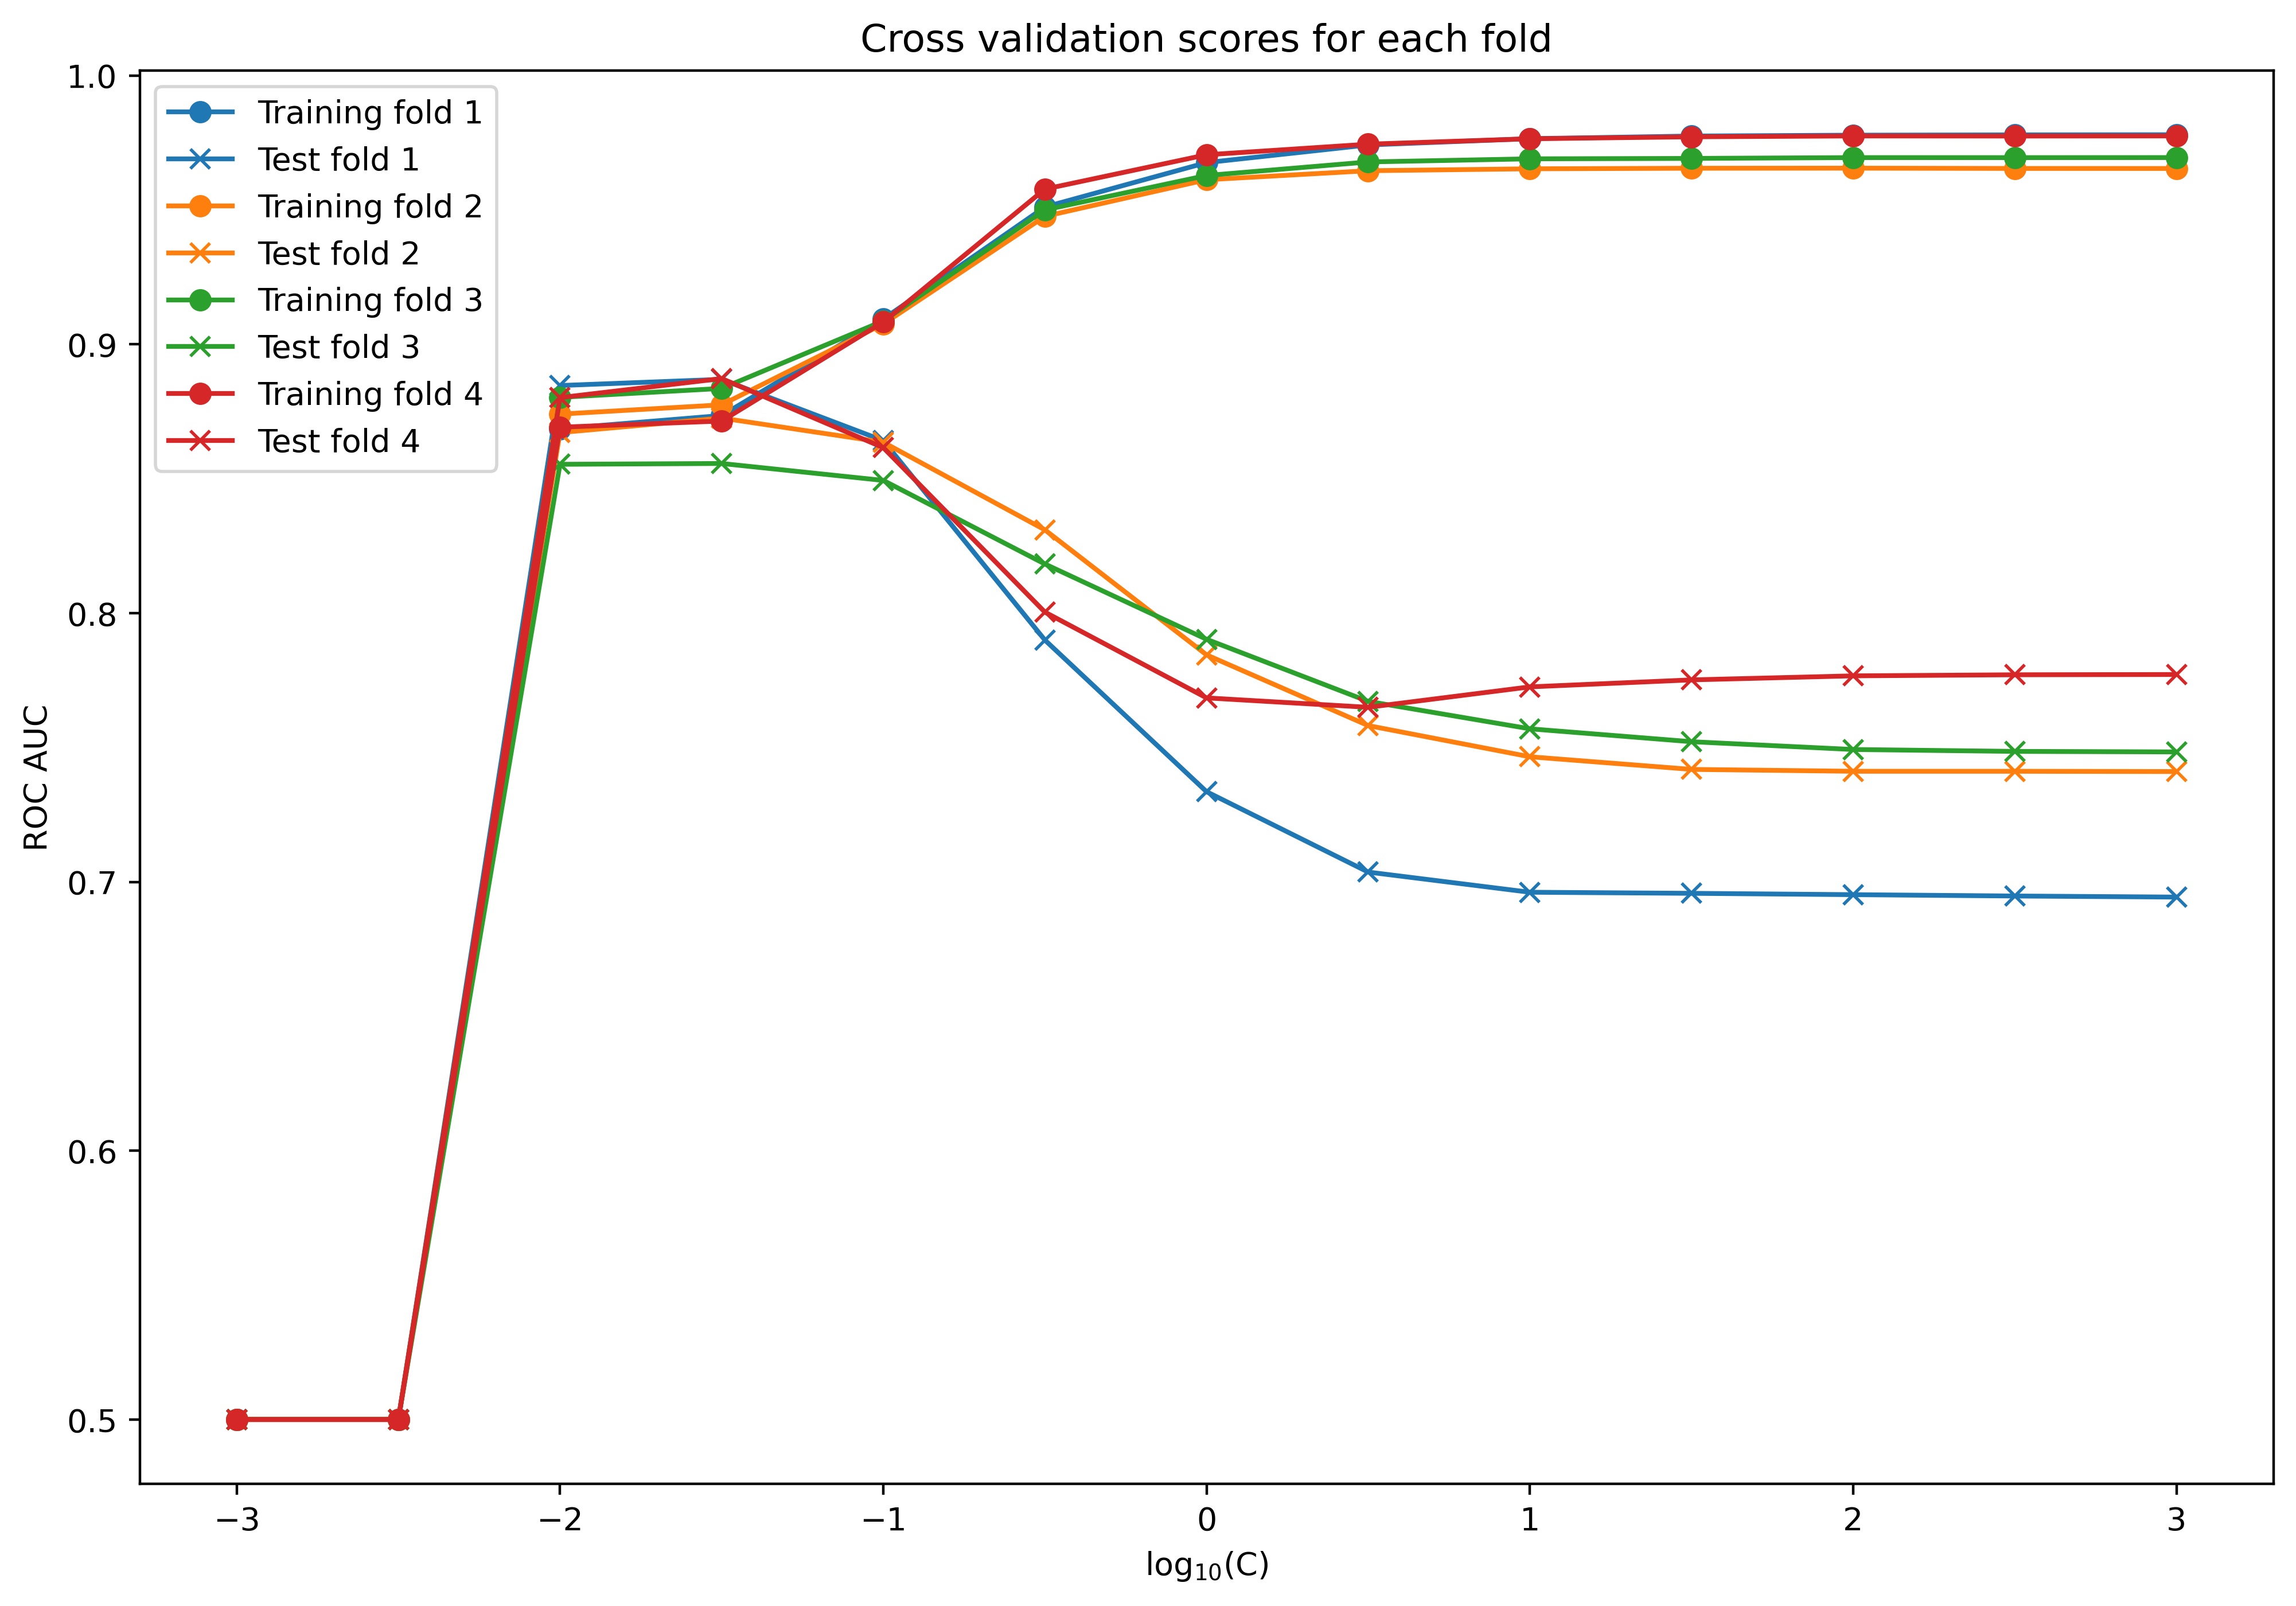

In [150]:
# Plot the training and test scores vs C values to evaluate overfitting
plt.figure(figsize=(12,8))
for this_fold in range(k_folds.n_splits):
    plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o', # folds are rows, C vals are columns
             color=cmap(this_fold), label=f'Training fold {this_fold+1}') # so each row is different C vals
    plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x',              
             color=cmap(this_fold), label=f"Test fold {this_fold+1}")
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()    
plt.title('Cross validation scores for each fold')

Text(0.5, 1.0, 'Cross validation scores averaged for each C over all folds')

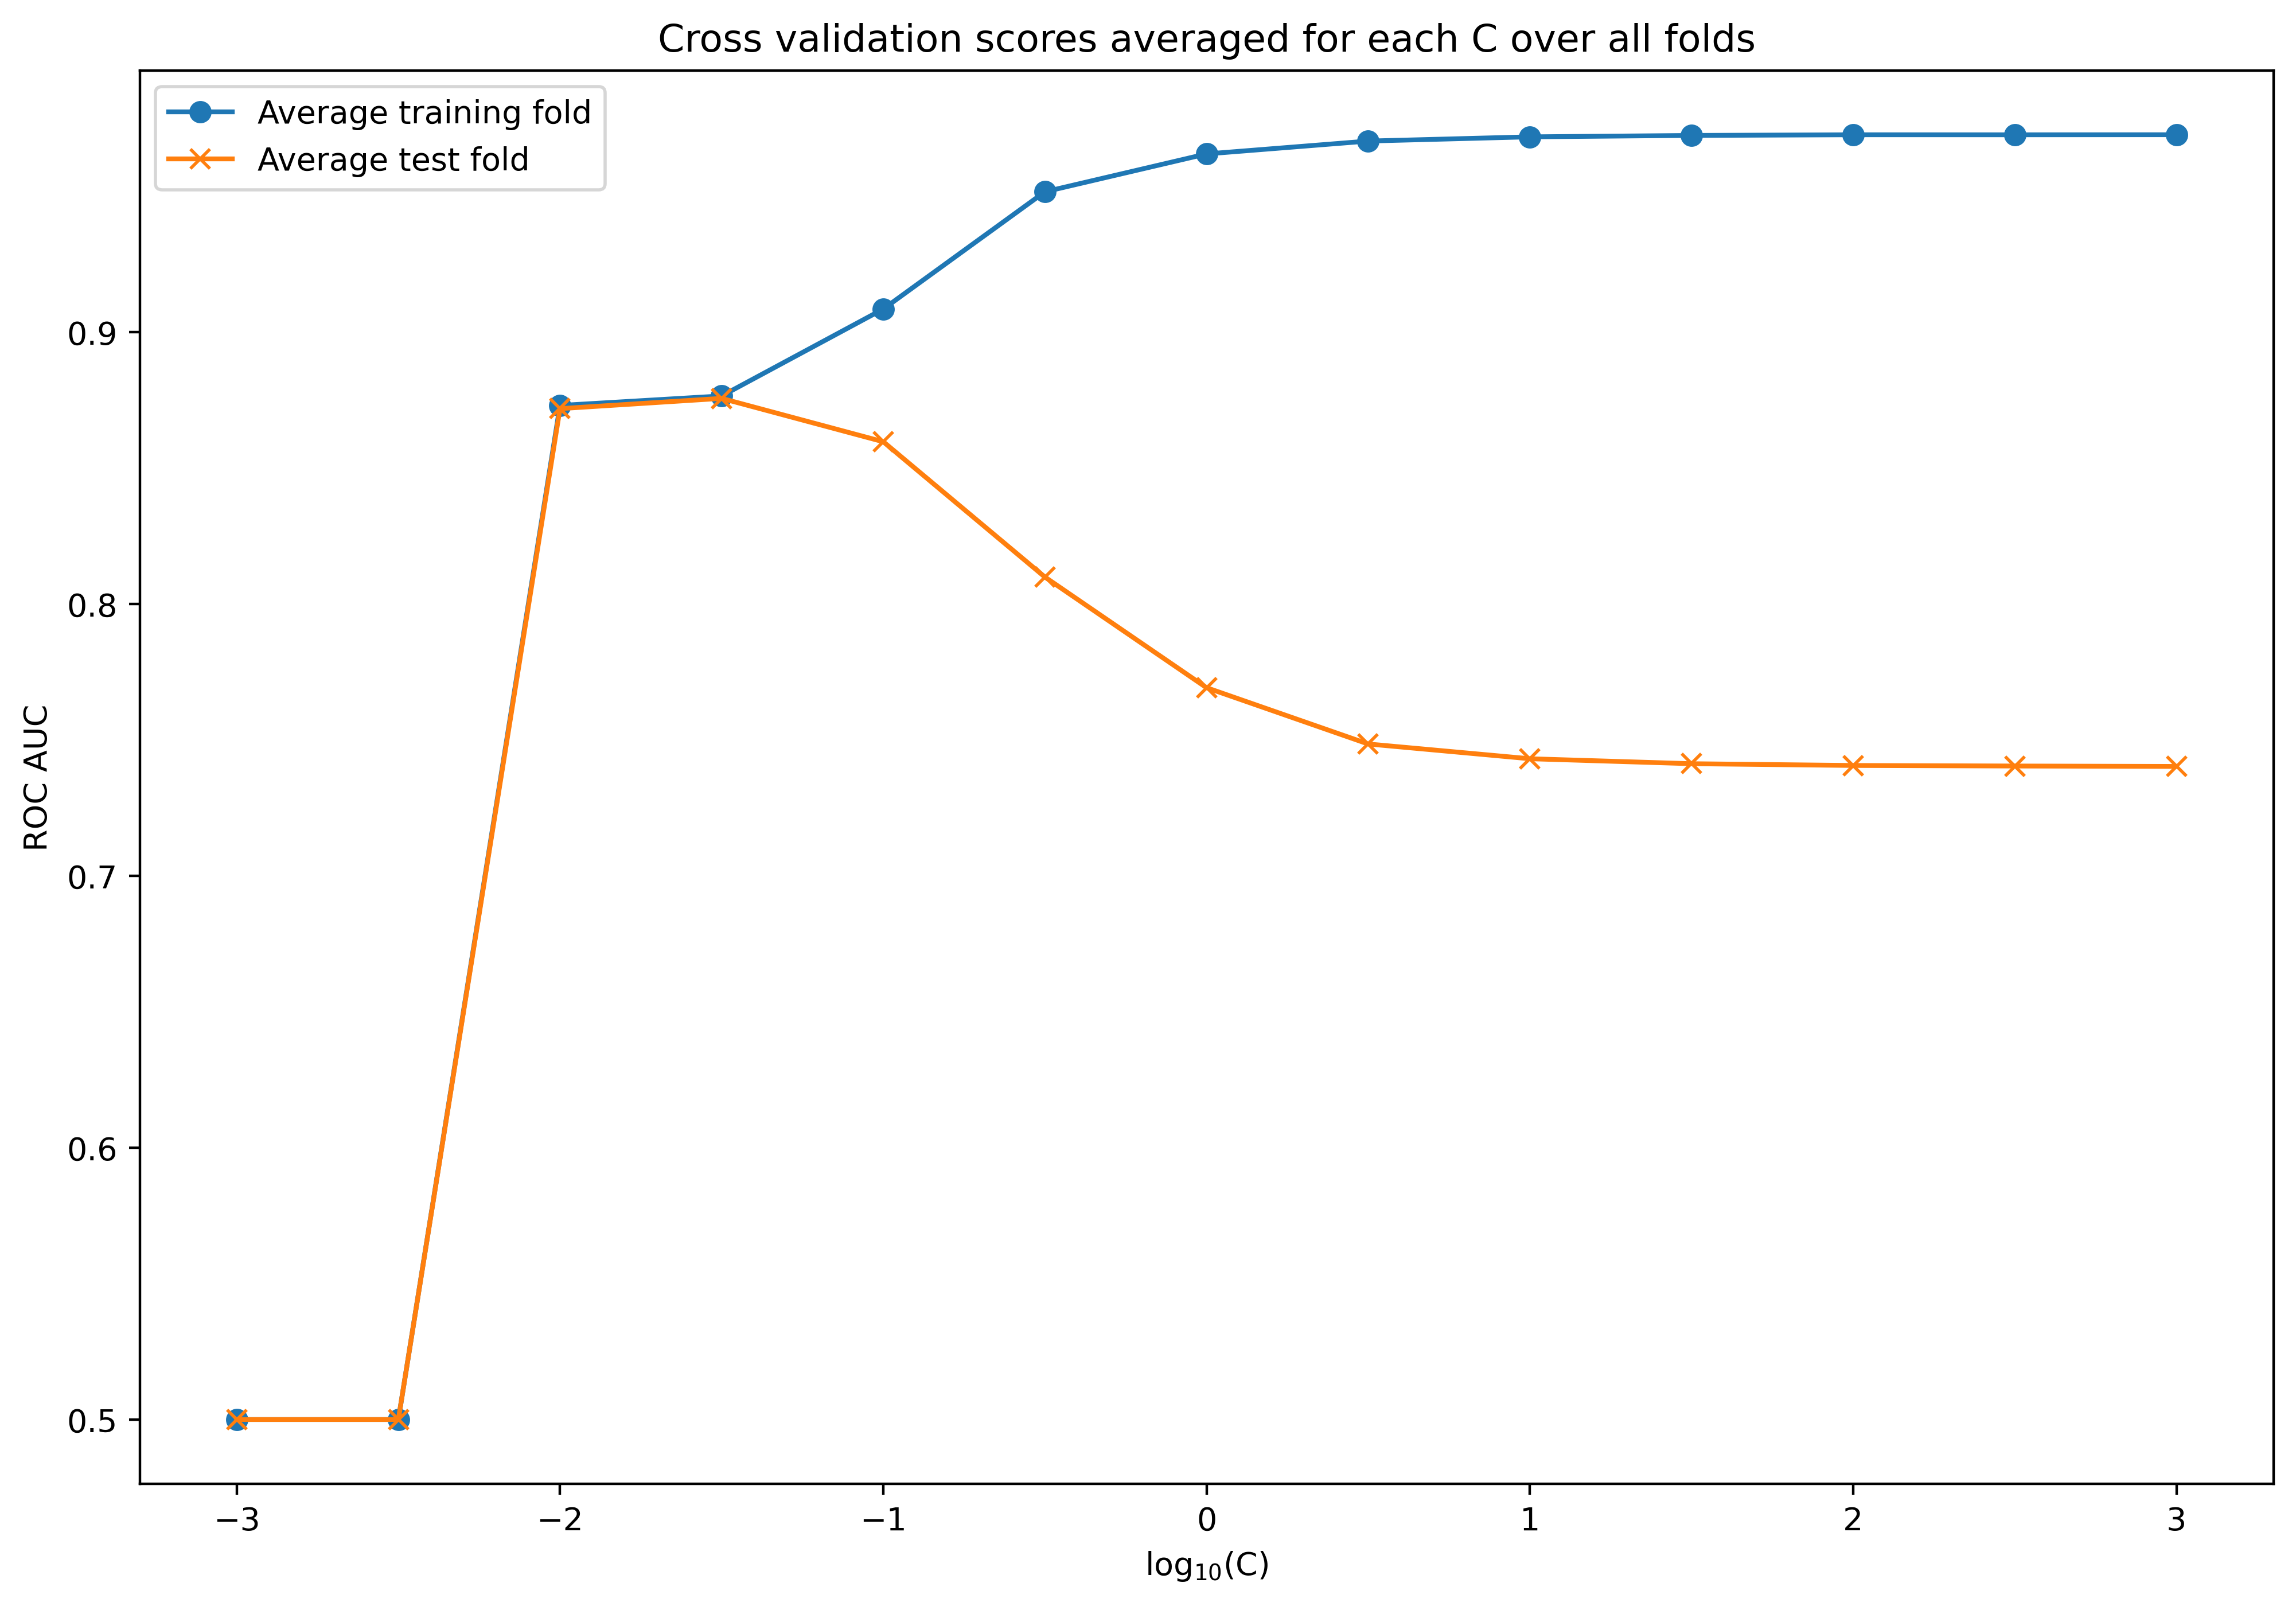

In [151]:
# Plot the mean of the training and test ROC AUC scores for each C value 
plt.figure(figsize=(12,8))

plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o',  # average for each C across folds
            label=f'Average training fold') 
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x',              
            label=f"Average test fold")
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()    
plt.title('Cross validation scores averaged for each C over all folds')

We can see that for $C = 10^-2\;or\;10^{-1.5}$, there is little difference between the train test roc auc scores indicating that there is no overfitting; the roc auc score of 0.87 also indicates significant learning, hence no underfitting. On the other hand, for C = -1 or greater, we see a significant difference in the train and test roc auc scores indicating overfitting. For C = -2.5 or -3, we see underfitting as the roc auc score is 0.5, which is no better than a random guess model. Since the best model is obtained with $C = 10^-2\;or\;10^{-1.5}$, we are going to choose $C=10^{-1.5}$ for our remaining analysis.

In any real-world business application, I will need to choose a specific threshold, which goes along with specific true and false positive rates. These will be needed to use the classifier to make the required "yes" or "no" decision.

In [152]:
np.mean(cv_train_roc_auc, axis=0)

array([0.97262226, 0.97259448, 0.97260559, 0.97236113, 0.97184441,
       0.97029147, 0.96556322, 0.95163405, 0.90850752, 0.8765321 ,
       0.87303175, 0.5       , 0.5       ])

In [153]:
np.mean(cv_test_roc_auc, axis=0)

array([0.74024902, 0.74039904, 0.74059906, 0.74124912, 0.74307431,
       0.74849985, 0.76920192, 0.80990599, 0.85968597, 0.87563756,
       0.87186219, 0.5       , 0.5       ])

In [154]:
# Boolean array to find the index where C = 10^-1.5
best_C_val_bool = C_val_exponents == -1.5
best_C_val_bool.astype(int)                 # convert boolean array into integer version

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [155]:
# Convert interger version of boolean array into a single integer index using the nonzero function
best_C_val_ix = np.nonzero(best_C_val_bool.astype(int))
best_C_val_ix

(array([9]),)

In [156]:
best_C_val_ix[0][0]

9

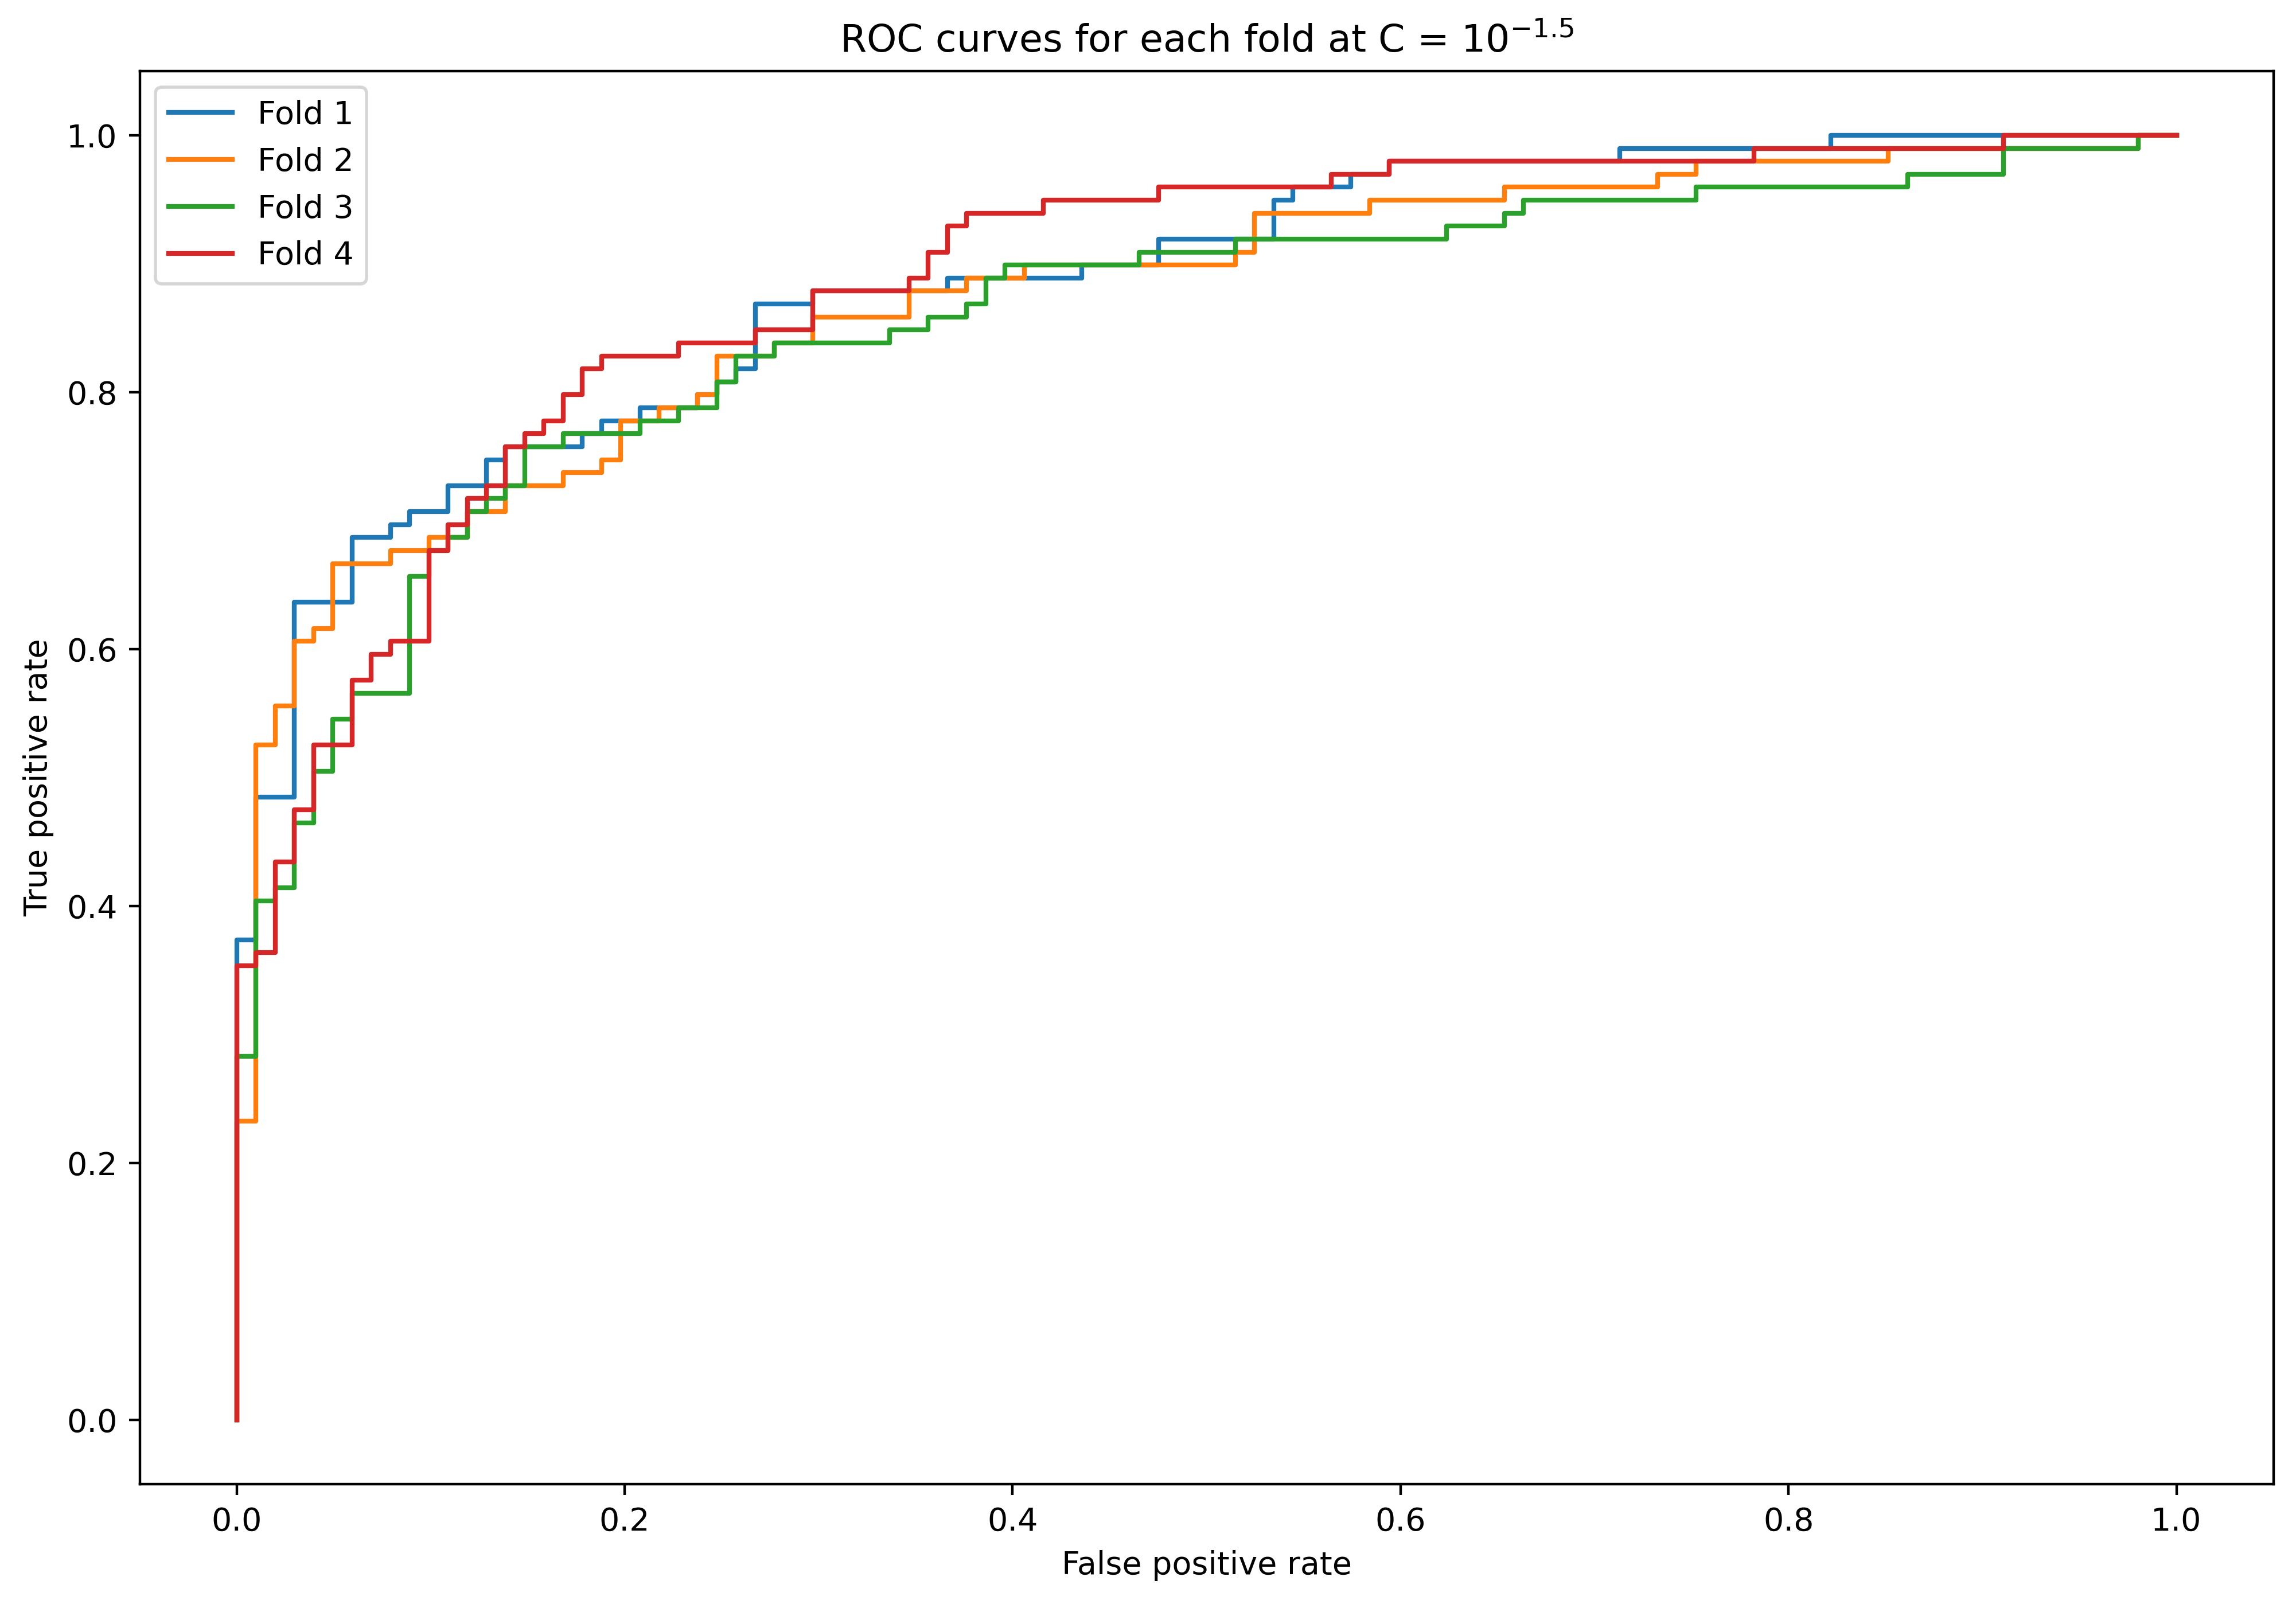

In [157]:
# Access the true and false positive rates in order to plot the ROC curves for each fold
plt.figure(figsize=(12,8))
for this_fold in range(k_folds.n_splits):
    fpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][0]
    tpr = cv_test_roc[best_C_val_ix[0][0]][this_fold][1]
    plt.plot(fpr, tpr, label=f'Fold {this_fold+1}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curves for each fold at C = $10^{-1.5}$')
plt.legend()

In [158]:
# Set the C value and train the model on all the training data 
lr_syn.C = 10**(-1.5)
lr_syn.fit(X_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [159]:
# Obtain predicted probabilities and ROC AUC score for training data 
y_syn_train_predict_proba = lr_syn.predict_proba(X_syn_train)
roc_auc_score(y_syn_train, y_syn_train_predict_proba[:,1])

0.8766376637663768

In [160]:
# Obtain predicted probabilities and ROC AUC score for test data 
y_syn_test_predict_proba = lr_syn.predict_proba(X_syn_test)
roc_auc_score(y_syn_test, y_syn_test_predict_proba[:,1])

0.9027568922305764

In [161]:
# How many coefficients did the L1 regularization set to 0
sum((lr_syn.coef_ != 0)[0])

2

In [162]:
# Examine the value of the intercept
lr_syn.intercept_

array([0.])

#### Scaling Data, Pipelines, And Interaction Features

In [163]:
df = pd.read_csv('intermediate_data/Chapter_1_cleaned_data.csv')

In [164]:
features_response = df.columns.tolist()

In [165]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [166]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [167]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'university', 'others']

In [168]:
features_response = [item for item in features_response if item not in items_to_remove]

In [169]:
features = features_response[:-1]
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [170]:
len(features)

17

In [171]:
X = df[features].values

In [172]:
X.shape

(26664, 17)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [174]:
print(X_train.shape)
print(X_test.shape)

(21331, 17)
(5333, 17)


In [175]:
from sklearn.preprocessing import MinMaxScaler 

min_max_sc = MinMaxScaler()

In [176]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=1000)

In [177]:
lr

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [178]:
from sklearn.pipeline import Pipeline 

scale_lr_pipeline = Pipeline(steps=[('scaler', min_max_sc),
                                    ('model', lr)])  # pipeline object to scale then model data

In [179]:
scale_lr_pipeline.get_params()  # parameters of all objects in pipeline object

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('model', LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'model': LogisticRegression(max_iter=1000, penalty='l1', solver='saga'),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'model__C': 1.0,
 'model__class_weight': None,
 'model__dual': False,
 'model__fit_intercept': True,
 'model__intercept_scaling': 1,
 'model__l1_ratio': None,
 'model__max_iter': 1000,
 'model__multi_class': 'auto',
 'model__n_jobs': None,
 'model__penalty': 'l1',
 'model__random_state': None,
 'model__solver': 'saga',
 'model__tol': 0.0001,
 'model__verbose': 0,
 'model__warm_start': False}

In [180]:
scale_lr_pipeline.get_params()['model__C']  # get the model_C parameter which belongs to model object

1.0

In [181]:
# use set_params() and object__property to properties like model inverse regularization strength C
scale_lr_pipeline.set_params(model__C=2)    # how to set a parameter, used for cross-validation below

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=2, max_iter=1000, penalty='l1',
                                    solver='saga'))])

In [182]:
C_val_exponents = np.linspace(2, -3, 6)
C_val_exponents

array([ 2.,  1.,  0., -1., -2., -3.])

In [183]:
C_vals = float(10)**C_val_exponents  # change C valus in exponential leaps
C_vals

array([1.e+02, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03])

In [201]:
def cross_val_C_search_pipe(k_folds, C_vals, pipeline, X,Y):
    n_folds = k_folds.n_splits                              # number of cross-valdiation folds/splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))     # store roc_auc of all folds for each C val; train
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))      # store roc_auc of all folds for each C val; test
    cv_test_roc = []

    for c_val_counter in range(len(C_vals)):
        # add an empty list to store tpr, fpr, threshold for current C val
        cv_test_roc.append([])
        # Set the C value for the model object inside pipline using set_params()
        pipeline.set_params(model__C=C_vals[c_val_counter])
        # Count folds for each value of C
        fold_counter = 0

        # Get training and testing indices for  each fold
        for train_index, test_index in k_folds.split(X,Y):
            # Subset the features and response, for traning and testing data for this fold
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]

            # Fit the model on training data
            pipeline.fit(X_cv_train, y_cv_train)    # pipeline is fit to only training data 

            # Get the training ROC AUC
            y_cv_train_predict_proba = pipeline.predict_proba(X_cv_train) # training predictions
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train,
                                                                          y_cv_train_predict_proba[:,1])
            
            # Get the testing ROC
            y_cv_test_predict_proba = pipeline.predict_proba(X_cv_test) # test predictions
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test,
                                                                         y_cv_test_predict_proba[:,1])
            
            # Testing ROC curves for each fold
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_proba[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc) # each fold appends to the same inner list

            #  Increment the fold counter
            fold_counter += 1
        
        # Indicate progress over C_values
        print(f'Done with C = {C_vals[c_val_counter]}')

    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc

In [202]:
%%time 
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals, 
                                                                         scale_lr_pipeline,
                                                                         X_train, y_train)

Done with C = 100.0
Done with C = 10.0
Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001
CPU times: user 12.7 s, sys: 12.1 s, total: 24.8 s
Wall time: 5.41 s


In [205]:
cv_test_roc_auc

array([[0.7068166 , 0.70672391, 0.70562638, 0.70488249, 0.70672938,
        0.5       ],
       [0.710132  , 0.7100101 , 0.70898924, 0.70676893, 0.70901156,
        0.5       ],
       [0.72258086, 0.72228189, 0.71950308, 0.71595412, 0.71652519,
        0.5       ],
       [0.73546227, 0.73526576, 0.73375491, 0.73283937, 0.73365026,
        0.5       ]])

Text(0.5, 1.0, 'Cross validation scores averaged for each C over all folds')

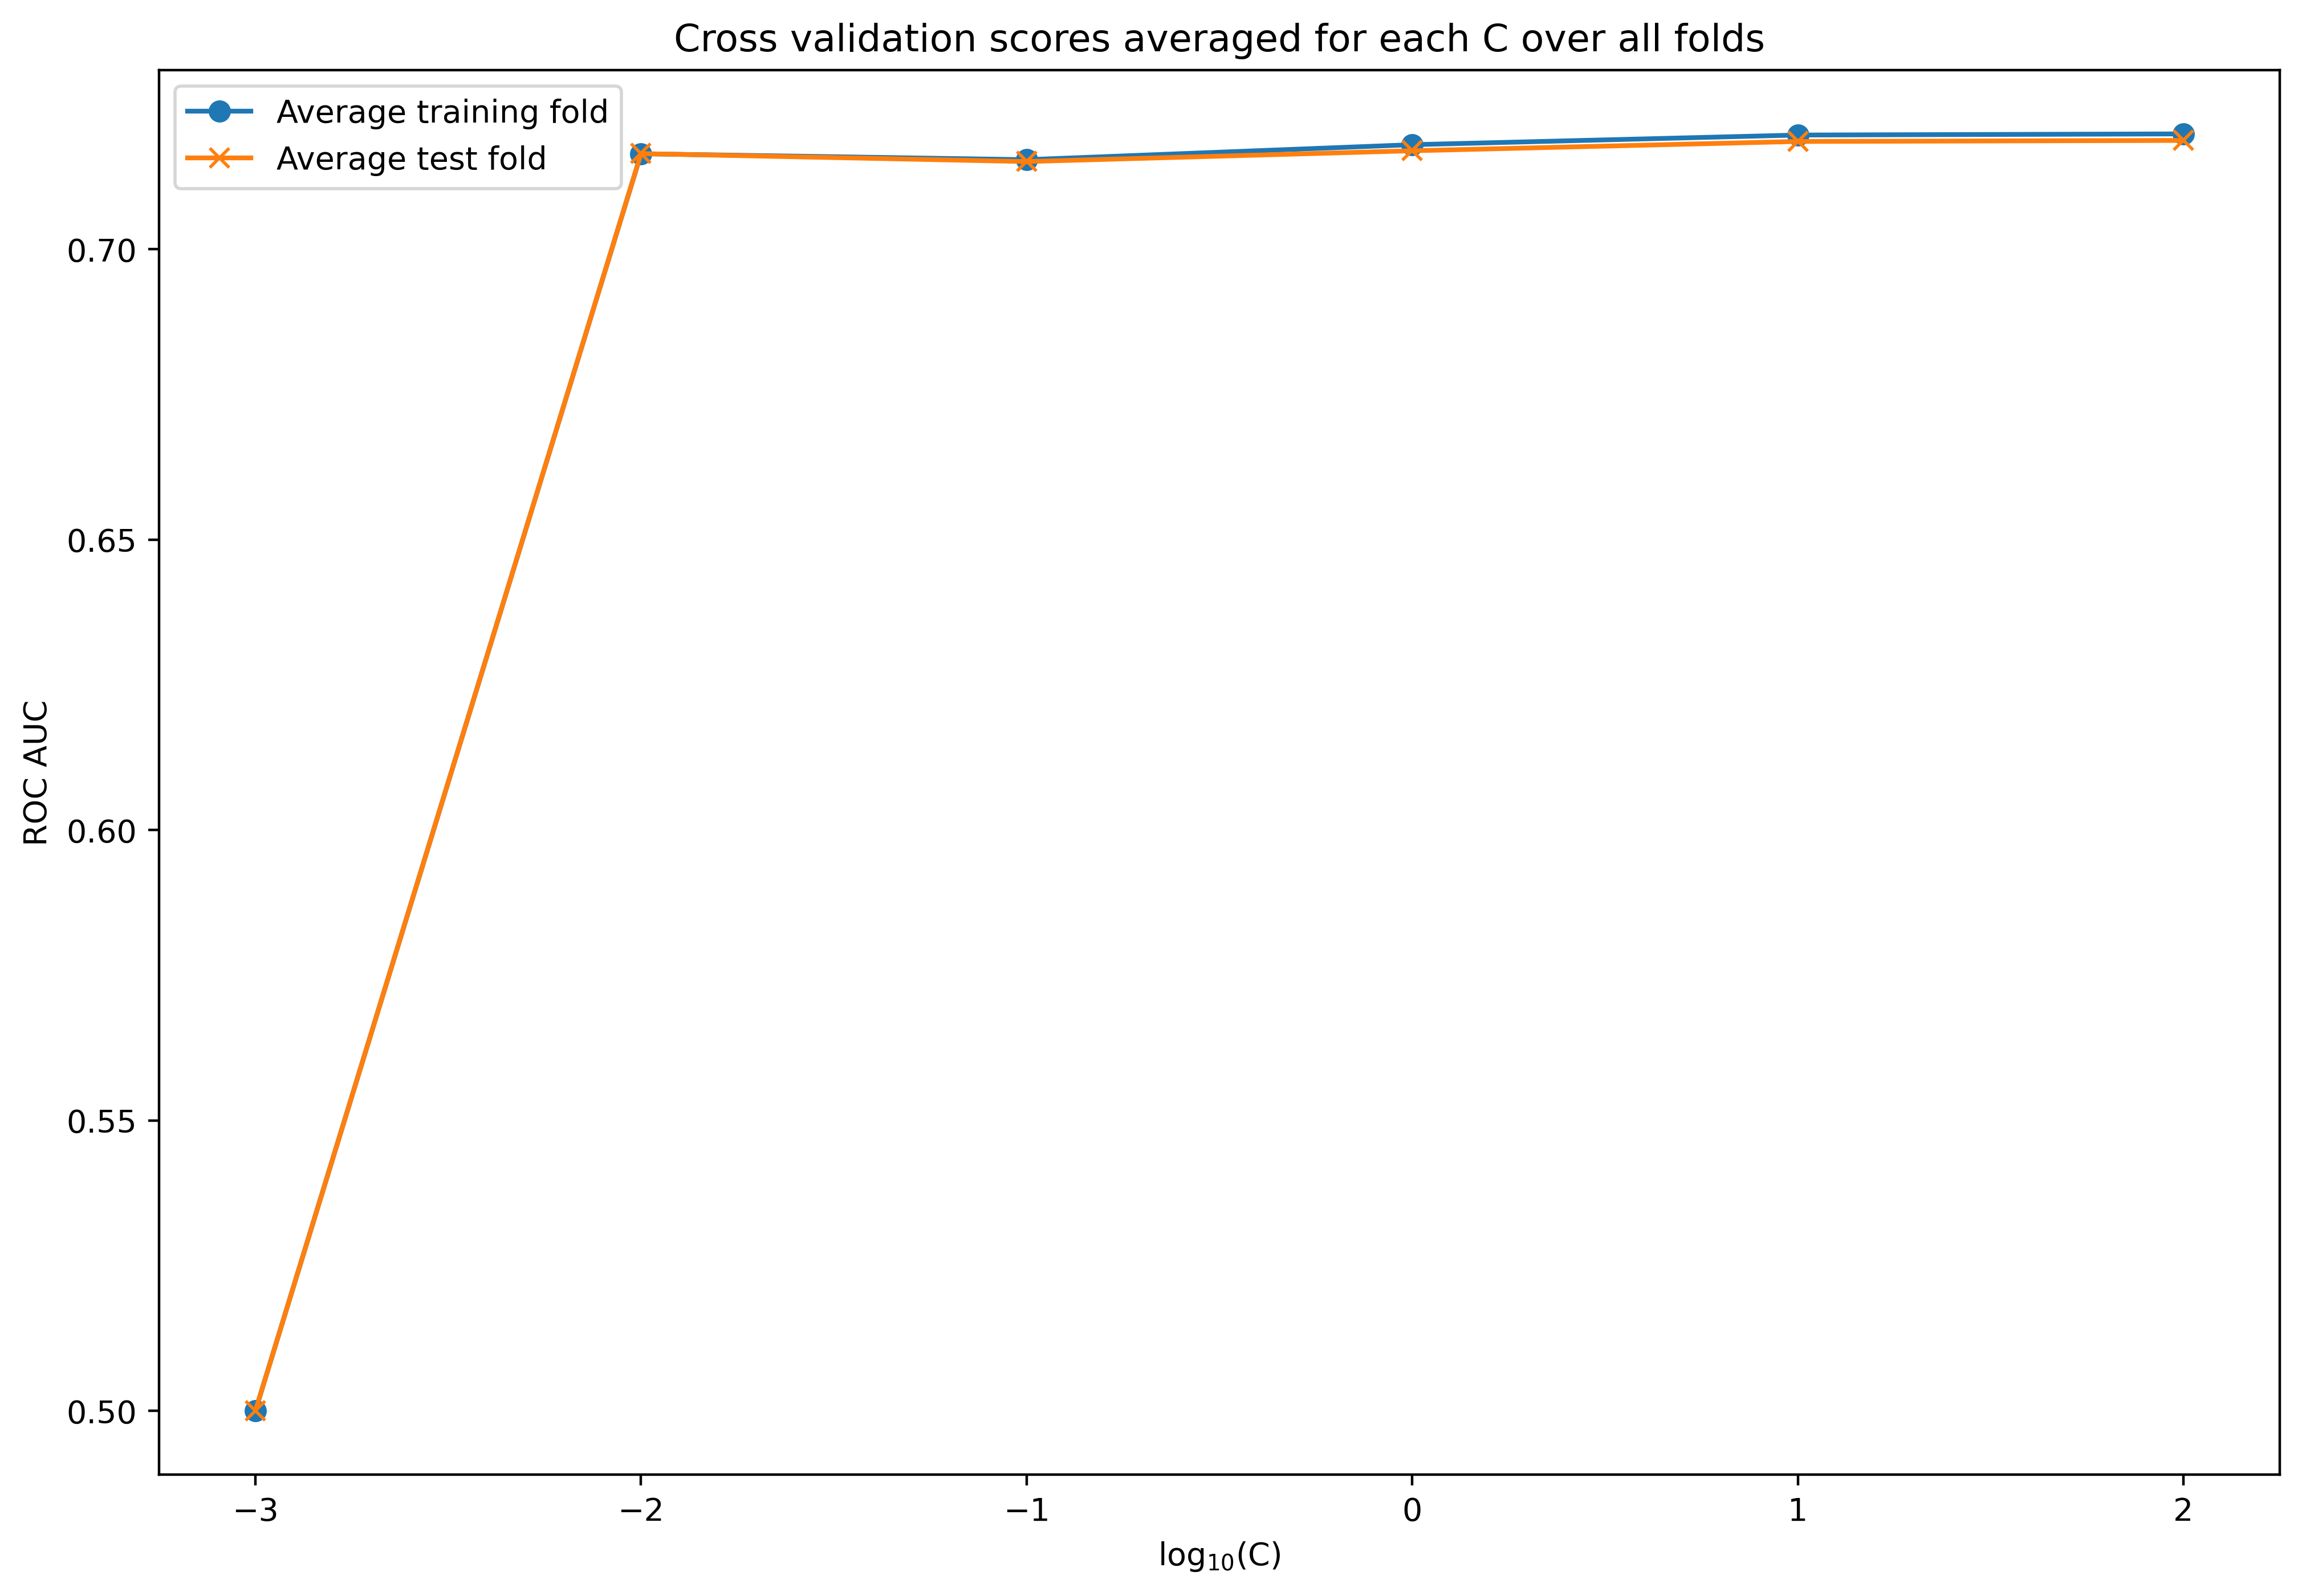

In [206]:
# Plot the mean of the training and test ROC AUC scores for each C value 
plt.figure(figsize=(12,8))
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o', label='Average training fold')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x', label="Average test fold")
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()    
plt.title('Cross validation scores averaged for each C over all folds')

In [211]:
sum(y_train==1)/100

47.59

There isnt a significant performance difference between the training data and the test data. Hence, overfitting is not a problem here. The average roc auc is around 0.70 and this is rather low, hence underfitting maybe an issue. Also seeing as we our rarerest class has 4579 examples in the dataset, and we only have 17 features, per the rule of 10, we could do with more features. One strategy is to engineer new features, such as interaction and polynomial features. Polynomials may not make sense given the way that some of the data has been encoded; for example, -1^2=1, which may not be sensible for PAY_1 ie a polynomial feature for someone who duly paid will be the same as someone who is 1 month late. We may however wish to try creating interaction features to capture the relationships between features. The PolynomialFeatures class can be used to create interaction features only, without polynomial features.

In [213]:
# Making interaction features only, without polynomial features
from sklearn.preprocessing import PolynomialFeatures 

make_interactions = PolynomialFeatures(degree=2,                # degree of polynomials
                                       interaction_only=True,   # only interactions, no polynomials
                                       include_bias=False)      # use only features, not the bias
X_interact = make_interactions.fit_transform(X)                 # fit transform entire dataset

In [214]:
X_interact.shape

(26664, 153)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_interact, df['default payment next month'].values,
                                                    test_size=0.2, random_state=24)

In [216]:
print(X_train.shape)
print(X_test.shape)

(21331, 153)
(5333, 153)


In [217]:
%%time
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search_pipe(k_folds, C_vals,
                                                                         scale_lr_pipeline,
                                                                         X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 100.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 10.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done with C = 1.0
Done with C = 0.1
Done with C = 0.01
Done with C = 0.001
CPU times: user 3min 59s, sys: 23.6 s, total: 4min 22s
Wall time: 3min 52s


Text(0.5, 1.0, 'Cross validation scores averaged for each C over all folds')

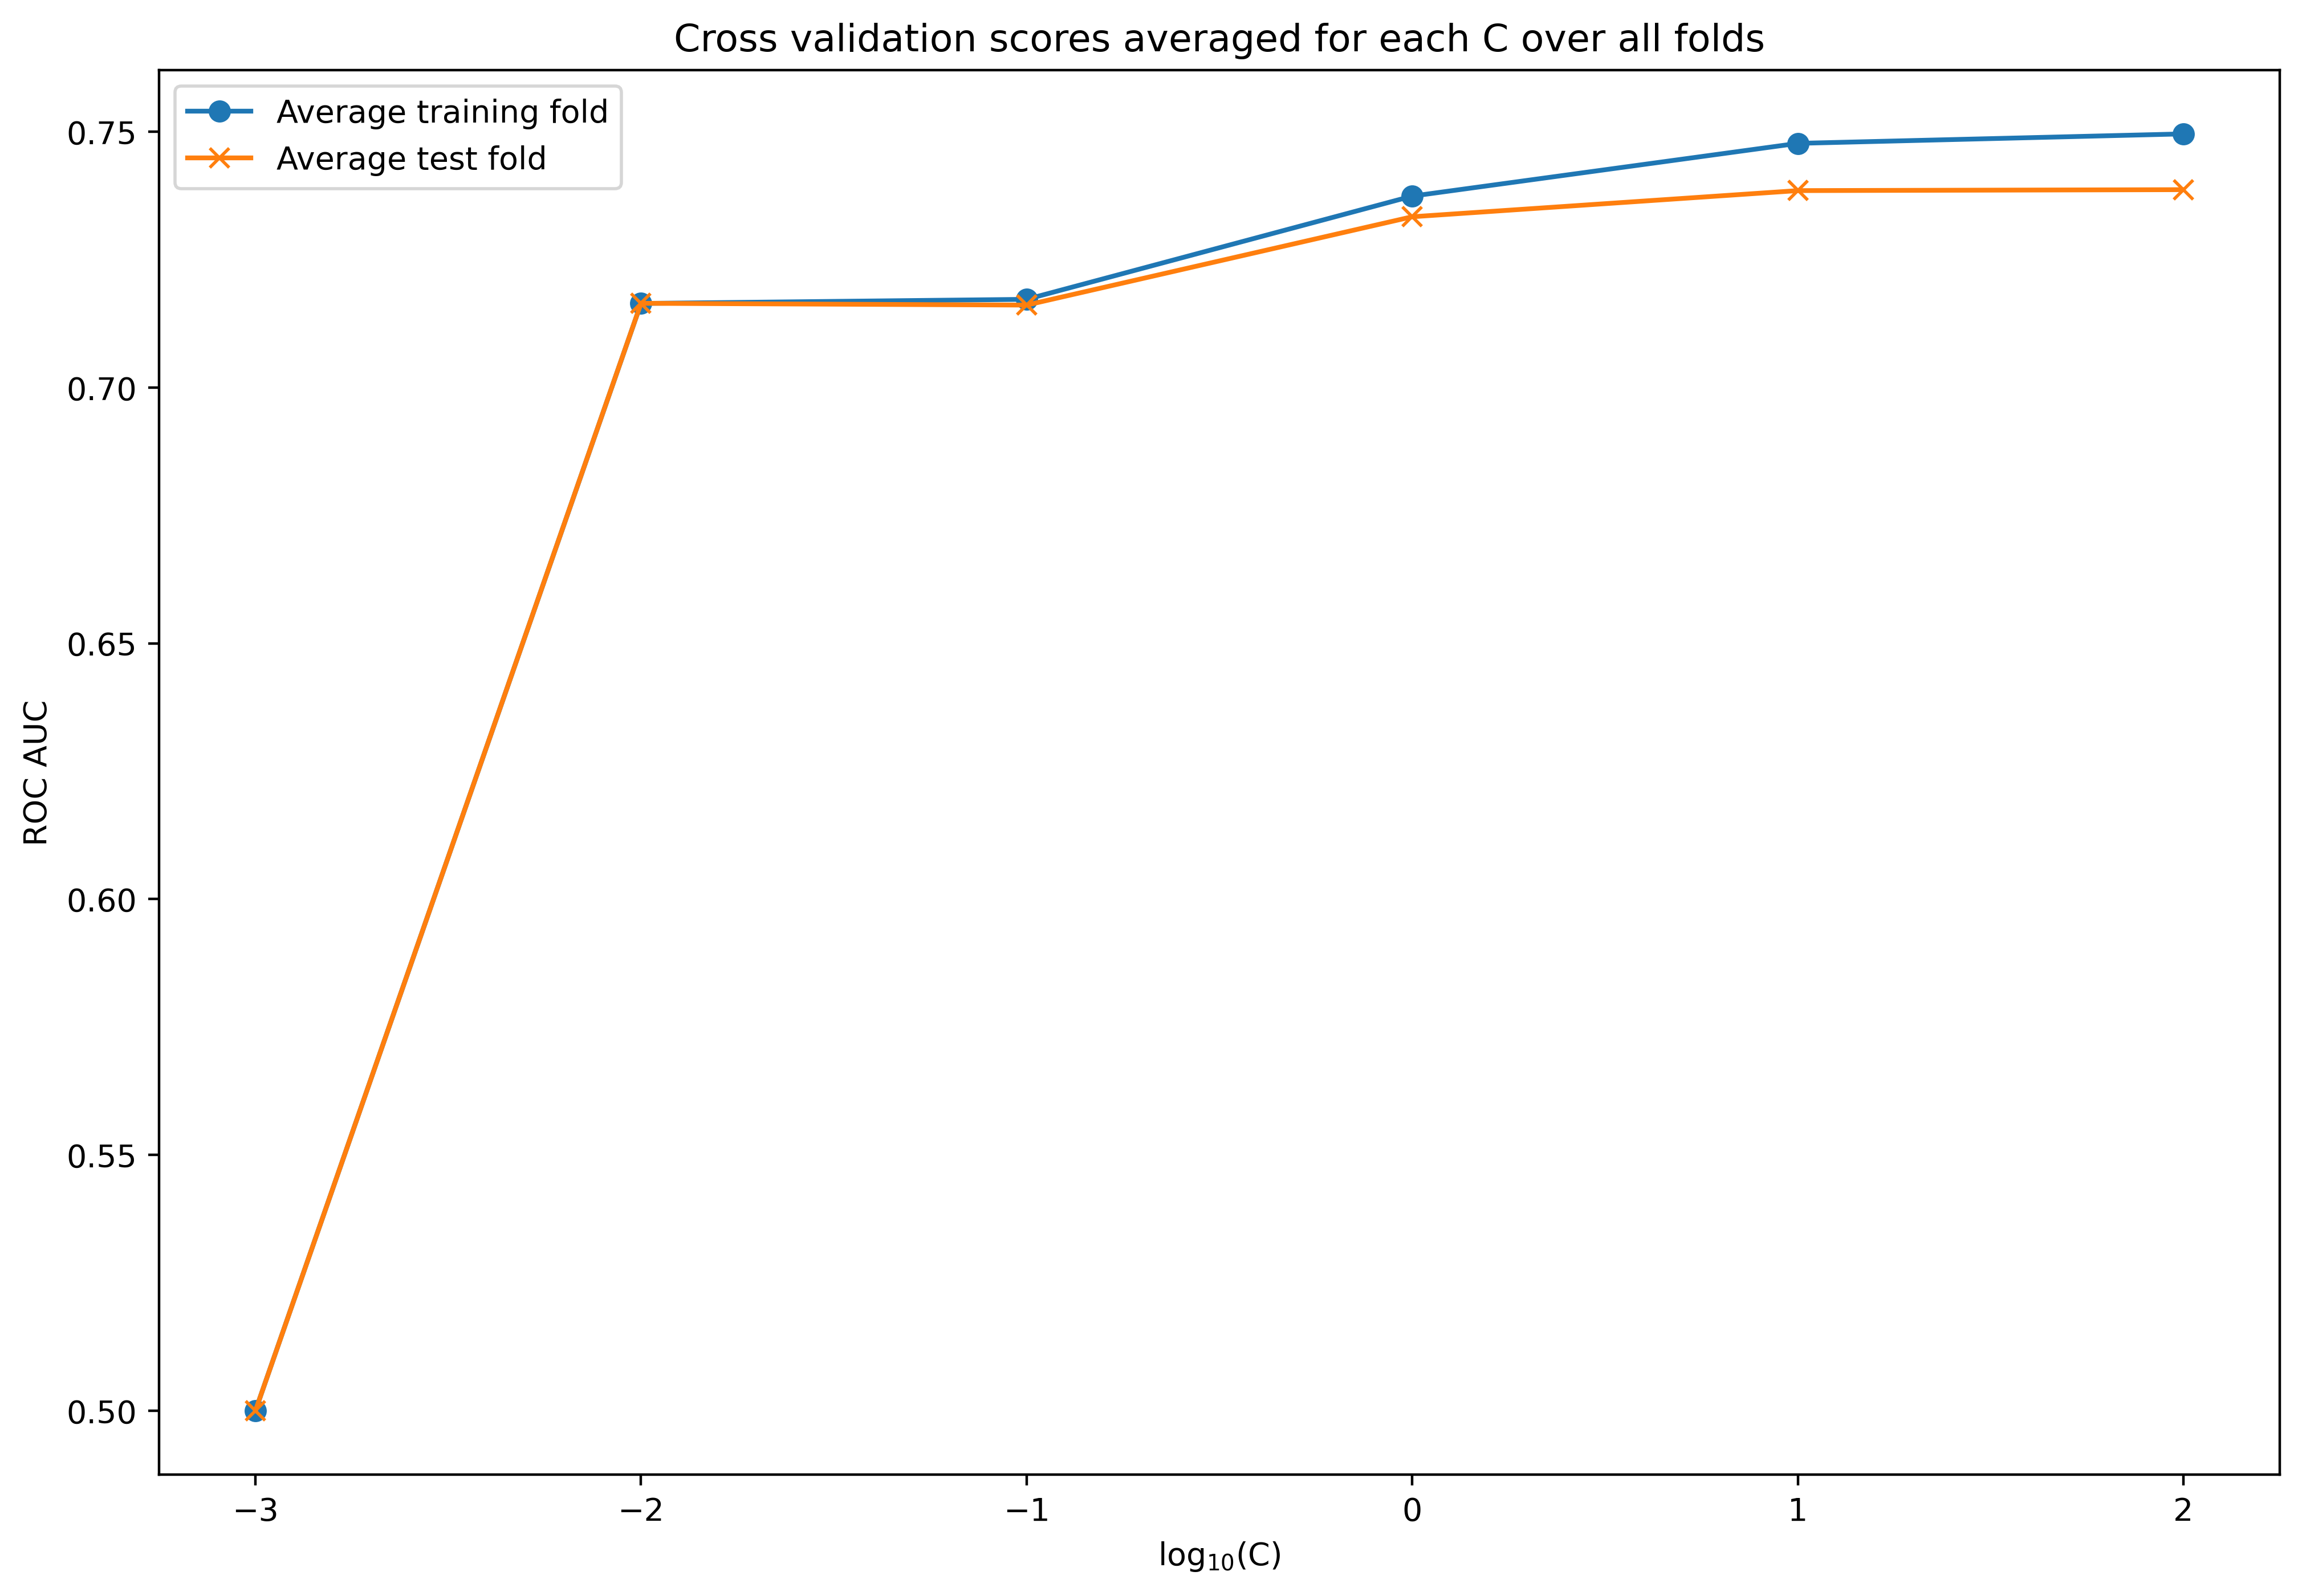

In [218]:
# Plot the mean of the training and test ROC AUC scores for each C value 
plt.figure(figsize=(12,8))
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis=0), '-o', label='Average training fold')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis=0), '-x', label="Average test fold")
plt.ylabel('ROC AUC')
plt.xlabel('log$_{10}$(C)')
plt.legend()    
plt.title('Cross validation scores averaged for each C over all folds')

In [220]:
np.mean(cv_test_roc_auc, axis=0)

array([0.73869079, 0.73850582, 0.73339447, 0.71612802, 0.7164791 ,
       0.5       ])

Looks like the interaction features didnt do much to improve the roc auc of our logistic regression model. If anything it introduces a previously non-existent overfitting issue when the regularization parameter equals or greater than 10^0.